In [4]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from datetime import date, timedelta
import datetime
import re
'''This code scrapes box office mojo for all movie data in between dates d1 to d2'''

d1 = date(2020,8,24)
#d1 = date(2020,12,7)
d2 = date(2020,12,6)

#d2 = datetime.date.today() - timedelta(days=4)
#d1 = d2 - timedelta(days=6)

dd = [d1 + timedelta(days=x) for x in range((d2-d1).days + 1)][::-1]
rows = 0
df = pd.DataFrame(columns = ['Date','TD', 'YD', 'Release', 'Daily', '%+-YD', '%+-LW', 'Theatre', 'Avg', 'To Date', 'Days', 'Distributor'])

for date in dd:
    count = 0
    while True:
        if count == 50:
            break
        try:
            source = requests.get('https://www.boxofficemojo.com/date/'+str(date)+'/').text
            soup = BeautifulSoup(source, 'lxml')
            table = soup.find('table')
            data = table.find_all('tr')
            
        except:
            count += 1
            continue
        break

    master_list = []

    for row in data:
        row_list = [date]
        try:
            for entry in row.find_all('td'):
                if entry.text == 'false' or entry.text == 'true':
                    continue
                row_list.append(entry.text)

            if len(row_list) == 12:
                master_list.append(row_list)
        except:
            continue


    for i in range(len(master_list)):
        df.loc[rows] = master_list[i]
        rows += 1
df

Date TD YD                Release       Daily   %+-YD      %+-LW  \
0     2020-12-06  1  1  The Croods: A New Age  $1,240,730  -39.6%     -43.6%   
1     2020-12-06  2  2          Half Brothers    $175,150  -39.1%          -   
2     2020-12-06  3  3                 Freaky    $113,710  -47.4%     -38.6%   
3     2020-12-06  4  4   The War with Grandpa     $81,824  -47.3%     -34.4%   
4     2020-12-06  5  6            All My Life     $81,790  -44.3%          -   
...          ... .. ..                    ...         ...     ...        ...   
2364  2020-08-24  4  4                  Tulsa      $7,431  -65.1%          -   
2365  2020-08-24  5  5             The Rental      $6,390  -53.8%     -44.3%   
2366  2020-08-24  6  7                  Tesla      $3,724  -62.5%          -   
2367  2020-08-24  7  6          The Gentlemen      $3,600  -73.3%  +1,253.4%   
2368  2020-08-24  8  8          Made in Italy        $614  -70.1%     -75.4%   

     Theatre   Avg      To Date Days              Distributor  
0      2,205  $562  $20,340,265   12   Universal Pictures\n\n  
1      1,369  $127     $700,160    3       Focus Features\n\n  
2      1,502   $75   $7,755,950   24   Universal Pictures\n\n  
3      1,285   $63  $17,621,195   59          101 Studios\n\n  
4        970   $84     $370,315    3   Universal Pictures\n\n  
...      ...   ...          ...  ...                      ...  
2364     191   $38      $85,853    4  Pryor Entertainment\n\n  
2365     105   $60   $1,516,717   32            IFC Films\n\n  
2366     108   $34      $45,889    4            IFC Films\n\n  
2367      38   $94  $36,458,123  214    STX Entertainment\n\n  
2368      37   $16      $88,691   18            IFC Films\n\n  

[2369 rows x 12 columns]

In [7]:
import gtab
import numpy as np

'''This code merges box office mojo with google trends data'''

df.loc[:, 'google trends'] = 0
for movie in df['Release'].unique():
    count = 0
    while True:
        if count == 5:
            break
        try:
            movie_search_term = re.sub('\:.*$', '', movie)
            movie_search_term = re.sub('2020 Re-release', '', movie_search_term)
            movie_search_term = movie_search_term + ' movie'

            t = gtab.GTAB();
            t.set_options(pytrends_config={"timeframe": f"{str(d1)} {str(d2)}"}); 
            query = t.new_query(movie_search_term);

            for date in query.index:
                df.loc[df['Release'].eq(movie) & df['Date'].eq(date), 'google trends'] = query.loc[date, 'max_ratio']
        except:
            count += 1
            continue
        break
df

Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'The Croods movie'
New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Half Brothers movie'
New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Vanguard movie'
New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Buddy Games movie'
New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'The Forgotten Carols movie'
New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchor

Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'In the Life of Music movie'
New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'The Shade Shepherd movie'
Could not calibrate. Time series for query too low everywhere.
error. . . 
1
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New qu

Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Tulsa movie'
New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Bump Kowalski and the Ten Commandments movie'
Keyword Bump Kowalski and the Ten Commandments movie is bad!
error. . . 
1
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'The Nightmare Before Christmas movie'
New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Monsters, Inc. movie'
New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Alita movie'
New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: goo

Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Save Yourselves! movie'
Keyword Save Yourselves! movie is bad!
error. . . 
1
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Save Yourselves! movie'
Keyword Save Yourselves! movie is bad!
error. . . 
2
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New q

New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'The Eight Hundred movie'
New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Rent-A-Pal movie'
Could not calibrate. Time series for query too low everywhere.
error. . . 
1
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_

New query calibrated!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Juvenile Delinquents movie'
Could not calibrate. Time series for query too low everywhere.
error. . . 
1
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Juvenile Delinquents movie'
Could not calibrate. Time series for query too low everywhere.
error. . . 
2
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv



Date TD YD                Release       Daily   %+-YD      %+-LW  \
0     2020-12-06  1  1  The Croods: A New Age  $1,240,730  -39.6%     -43.6%   
1     2020-12-06  2  2          Half Brothers    $175,150  -39.1%          -   
2     2020-12-06  3  3                 Freaky    $113,710  -47.4%     -38.6%   
3     2020-12-06  4  4   The War with Grandpa     $81,824  -47.3%     -34.4%   
4     2020-12-06  5  6            All My Life     $81,790  -44.3%          -   
...          ... .. ..                    ...         ...     ...        ...   
2364  2020-08-24  4  4                  Tulsa      $7,431  -65.1%          -   
2365  2020-08-24  5  5             The Rental      $6,390  -53.8%     -44.3%   
2366  2020-08-24  6  7                  Tesla      $3,724  -62.5%          -   
2367  2020-08-24  7  6          The Gentlemen      $3,600  -73.3%  +1,253.4%   
2368  2020-08-24  8  8          Made in Italy        $614  -70.1%     -75.4%   

     Theatre   Avg      To Date Days              Distributor  google trends  
0      2,205  $562  $20,340,265   12   Universal Pictures\n\n       0.190000  
1      1,369  $127     $700,160    3       Focus Features\n\n       0.069888  
2      1,502   $75   $7,755,950   24   Universal Pictures\n\n       2.142857  
3      1,285   $63  $17,621,195   59          101 Studios\n\n       0.057600  
4        970   $84     $370,315    3   Universal Pictures\n\n       0.290000  
...      ...   ...          ...  ...                      ...            ...  
2364     191   $38      $85,853    4  Pryor Entertainment\n\n       0.024960  
2365     105   $60   $1,516,717   32            IFC Films\n\n       0.042432  
2366     108   $34      $45,889    4            IFC Films\n\n       0.270000  
2367      38   $94  $36,458,123  214    STX Entertainment\n\n       0.059356  
2368      37   $16      $88,691   18            IFC Films\n\n       0.024960  

[2369 rows x 13 columns]

In [18]:
import pandas as pd
import numpy as np
'''Turns strings to floats'''

df['Daily'] = df.Daily.apply(lambda x: x.strip('$'))
df['%+-YD'] = df['%+-YD'].apply(lambda x: x.strip('%'))
df['%+-LW'] = df['%+-LW'].apply(lambda x: x.strip('%'))
df['Avg'] = df['Avg'].apply(lambda x: x.strip('$'))
df['To Date'] = df['To Date'].apply(lambda x: x.strip('$'))
df['Distributor'] = df.Distributor.apply(lambda x: x[0:-2])

df = df.replace(',','', regex=True)
df = df.replace('-', '0') #SHOUOLD BE NAN
df = df.replace('<0.1', '0')

df['Theatre'] = df['Theatre'].astype(float)
df['Days'] = df['Days'].astype(float)

df['Daily'] = df.Daily.astype(float)
df['%+-YD'] = df['%+-YD'].astype(float)
df['%+-LW'] = df['%+-LW'].astype(float)
df['Avg'] = df['Avg'].astype(float)
df['To Date'] = df['To Date'].astype(float)
df['TD'] = df['TD'].astype(float)
df['YD'] = df['YD'].astype(float)

In [19]:
#Combines daily into weekly data, divides by 7 where appropriate, removes data points with 'Weekly' == 0
from datetime import datetime
#convert date column into datetime object
df['Date'] = df['Date'].astype('datetime64[ns]')

#convert daily data to weekly
df_weekly = df.groupby("Release").resample('W-Mon', label='left', closed = 'left', on='Date').sum().reset_index().sort_values(by='Date')
df_weekly['Avg TD'] = df_weekly['TD'].apply(lambda x: x/7)
df_weekly = df_weekly.drop('TD', axis=1)
df_weekly['Avg YD'] = df_weekly['YD'].apply(lambda x: x/7)
df_weekly = df_weekly.drop('YD', axis=1)
df_weekly['Weekly'] = df_weekly['Daily']  #df_weekly['Daily'].apply(lambda x: x/7)
df_weekly = df_weekly.drop('Daily', axis=1)
df_weekly['Weekly %+-YD'] = df_weekly['%+-YD'] #df_weekly['%+-YD'].apply(lambda x: x/7)
#df_weekly.drop('%+-YD')
df_weekly['Weekly %+-LW'] = df_weekly['%+-LW'] #df_weekly['%+-LW'].apply(lambda x: x/7)
#df_weekly.drop('%+-YD')
df_weekly['Avg Theatre'] = df_weekly['Theatre'].apply(lambda x: x/7)
df_weekly = df_weekly.drop('Theatre', axis=1)
df_weekly['Avg per Theatre Avg'] = df_weekly['Avg'].apply(lambda x: x/7)
df_weekly = df_weekly.drop('Avg', axis=1)
df_weekly['Avg To Date'] = df_weekly['To Date'].apply(lambda x: x/7)
df_weekly = df_weekly.drop('To Date', axis=1)

df_weekly = df_weekly[df_weekly.Weekly != 0]

In [83]:
#df_weekly['Y'] = df_weekly['Date'].apply(lambda x: x + timedelta(days=7))
#df_temp = df_weekly[['Date', 'Release','Weekly']]
#df_weekly = df_weekly.merge(df_temp, 'left', left_on = ['Y', 'Release'], right_on = ['Date', 'Release'])
#df_weekly = df_weekly.drop('Date_y', axis=1)
#df_weekly = df_weekly.rename(columns={"Weekly_x": "Weekly", 'Weekly_y': 'Week + 1', 'Date_x': 'Date'})
#df_weekly['Week + 1'].fillna(0, inplace=True)

In [20]:
#Matches a row with the next weeks 'Weekly' columns which is target variable.  
from datetime import timedelta
df_weekly['Y'] = df_weekly['Date'].apply(lambda x: x + timedelta(days=7))
df_weekly['Week + 1'] = pd.Series(np.zeros(df_weekly.shape[0]))
for movie in df_weekly['Release'].unique():
    for date in df_weekly[df_weekly['Release'] == movie]['Date']:
        df_weekly.loc[(df_weekly['Release'] == movie) & (df_weekly['Y'] == date), 'Week + 1'] = float(df_weekly.loc[(df_weekly['Release'] == movie) & (df_weekly['Date'] == date)]['Weekly'])
        df_weekly['Week + 1'].fillna(0, inplace=True)
df_weekly

Release       Date  %+-YD   %+-LW  \
363     The SpongeBob Movie: Sponge on the Run 2020-08-24   40.5  -200.9   
345  The Personal History of David Copperfield 2020-08-24  -34.2     0.0   
58                                  Centigrade 2020-08-24  -72.5     0.0   
35                   Bill & Ted Face the Music 2020-08-24  -46.5     0.0   
254                                      Tesla 2020-08-24  -39.4  -185.8   
..                                         ...        ...    ...     ...   
295                              The Empty Man 2020-11-30   69.7  -447.0   
108                              Half Brothers 2020-11-30  -18.0     0.0   
22                           After We Collided 2020-11-30   87.2  -378.8   
164                                  Last Call 2020-11-30   16.7  -220.2   
218          Pray: The Story of Patrick Peyton 2020-11-30  638.8  1708.3   

      Days  google trends     Avg TD     Avg YD     Weekly  Weekly %+-YD  \
363   98.0       1.580645   3.428571   3.142857   876759.0          40.5   
345    6.0       0.114816   2.000000   1.142857   475800.0         -34.2   
58     6.0       0.343567   4.714286   3.142857     6480.0         -72.5   
35     6.0       0.108576   1.285714   0.857143  1125007.0         -46.5   
254   49.0       1.990000   7.857143   7.428571    34098.0         -39.4   
..     ...            ...        ...        ...        ...           ...   
295  294.0       0.055680  17.714286  17.285714     3631.0          69.7   
108    6.0       0.267072   0.857143   0.571429   700160.0         -18.0   
22   294.0       2.698413  20.857143  21.000000      957.0          87.2   
164   53.0       0.055910  16.000000  13.714286     1515.0          16.7   
218  285.0       0.074880  16.571429  12.714286      257.0         638.8   

     Weekly %+-LW  Avg Theatre  Avg per Theatre Avg   Avg To Date          Y  \
363        -200.9   320.857143           390.714286  2.572072e+06 2020-08-31   
345           0.0   582.857143            49.857143  1.496213e+05 2020-08-31   
58            0.0    12.000000            32.857143  2.206571e+03 2020-08-31   
35            0.0   431.571429           159.428571  3.494943e+05 2020-08-31   
254        -185.8    99.000000            49.571429  6.085743e+04 2020-08-31   
..            ...          ...                  ...           ...        ...   
295        -447.0    84.285714             5.714286  2.981493e+06 2020-12-07   
108           0.0   586.714286            72.857143  2.089457e+05 2020-12-07   
22         -378.8    10.857143            14.000000  2.385744e+06 2020-12-07   
164        -220.2    12.571429            14.142857  3.421286e+03 2020-12-07   
218        1708.3     1.428571            18.285714  5.072486e+04 2020-12-07   

      Week + 1  
363   345000.0  
345   515111.0  
58      3225.0  
35   1142565.0  
254     4732.0  
..         ...  
295        0.0  
108        0.0  
22         0.0  
164        0.0  
218        0.0  

[434 rows x 16 columns]

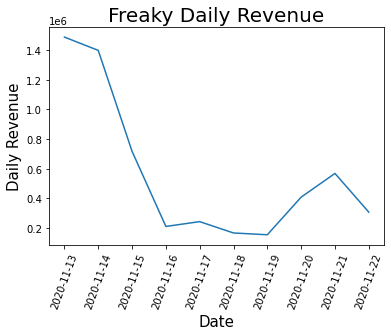

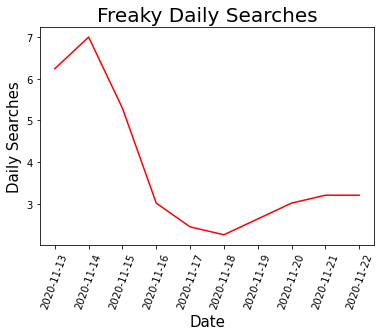

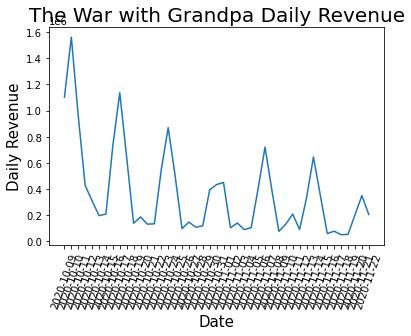

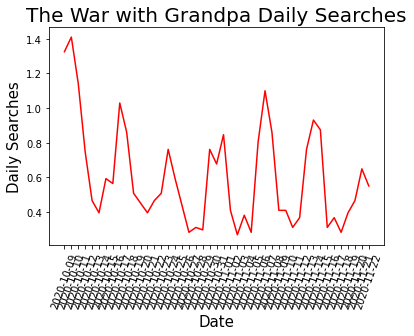

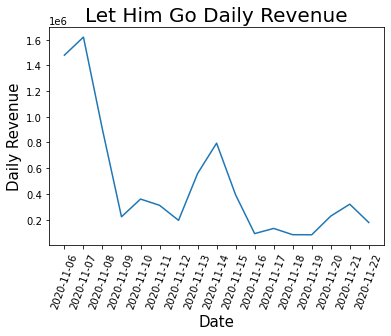

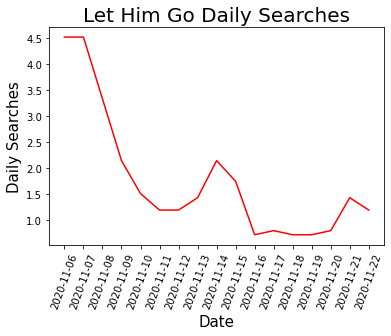

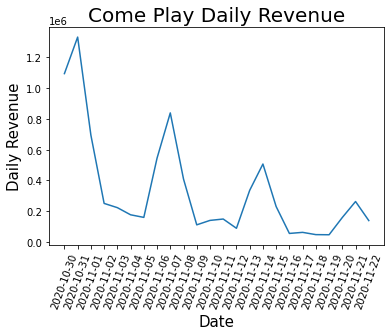

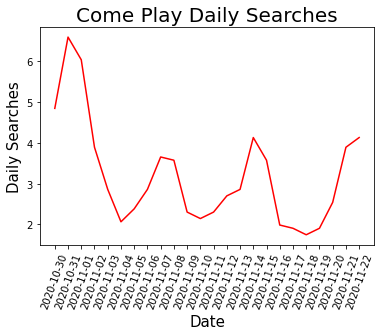

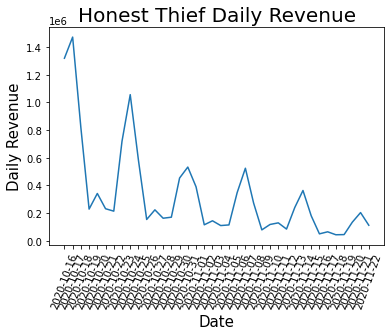

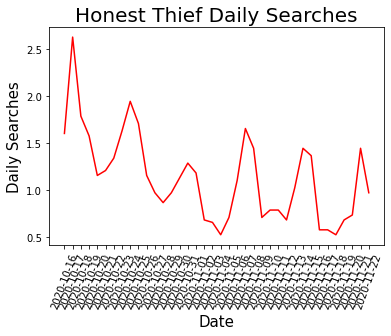

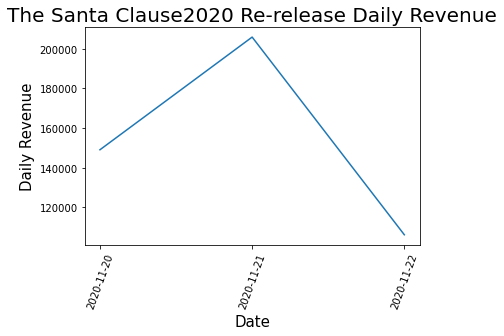

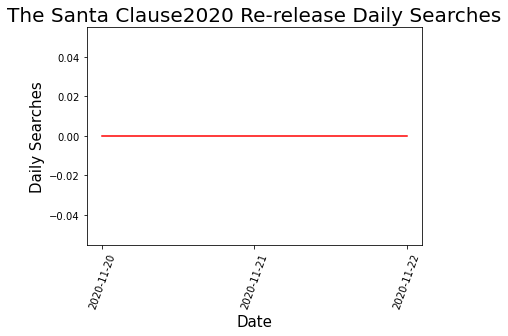

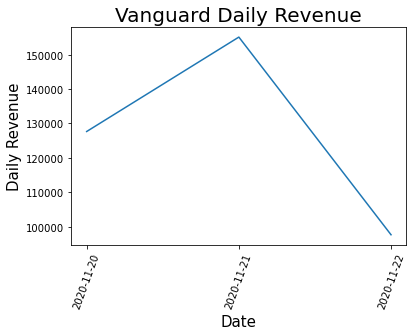

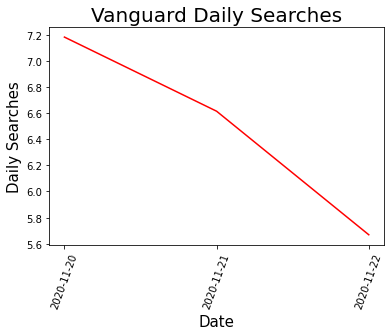

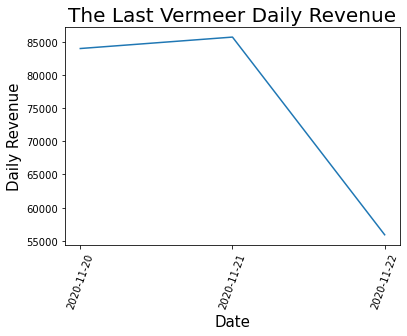

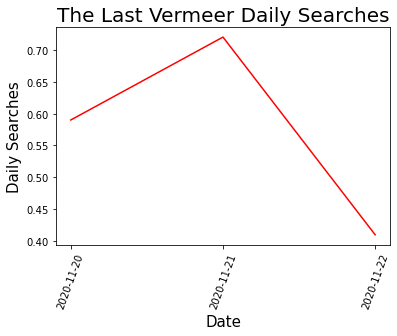

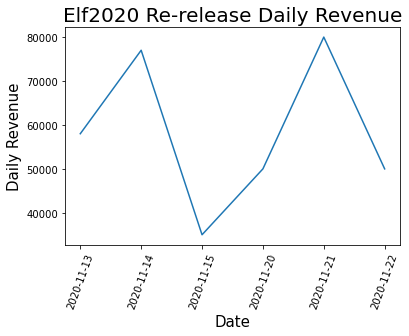

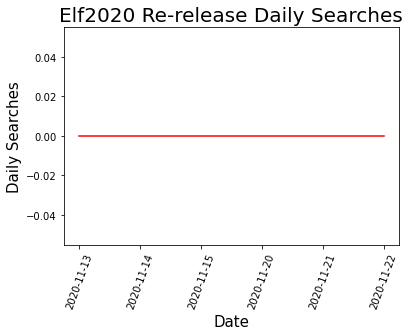

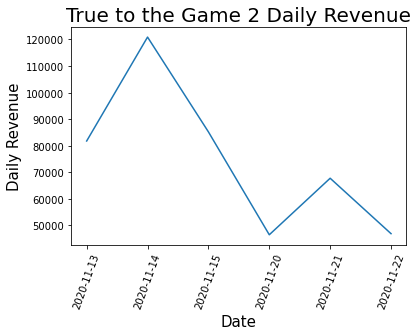

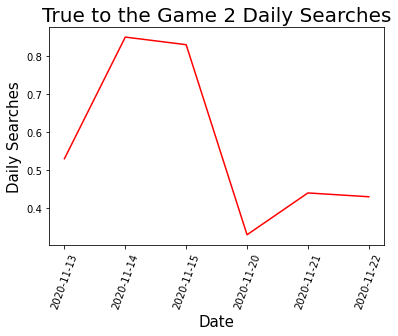

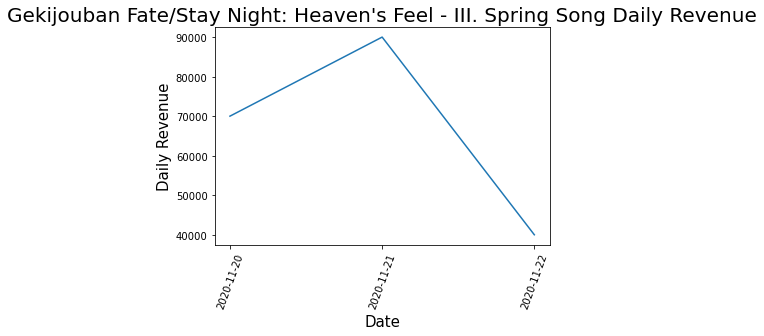

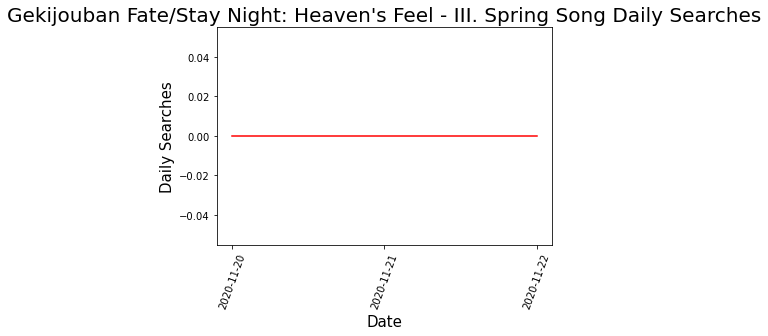

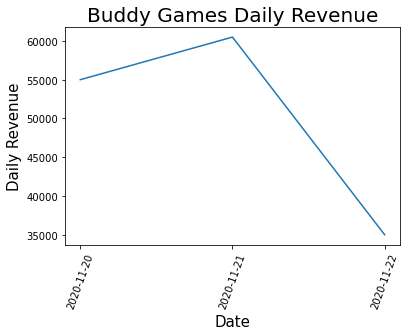

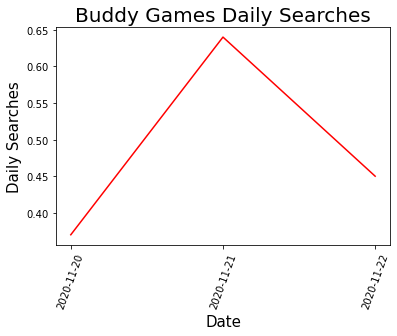

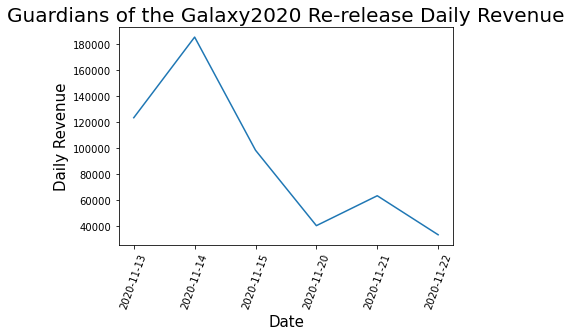

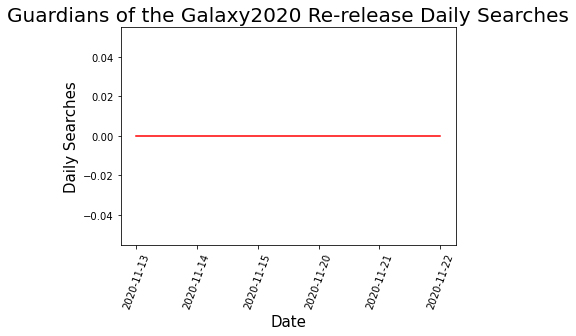

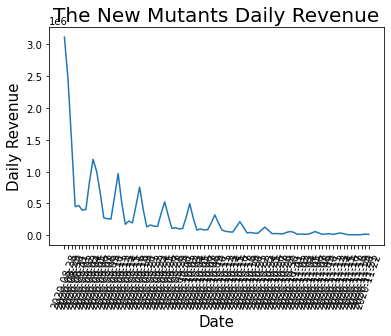

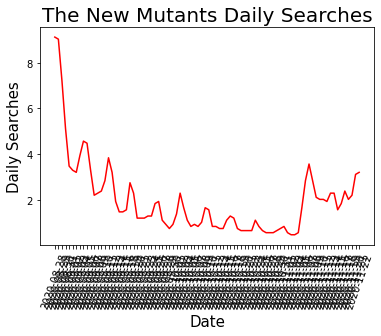

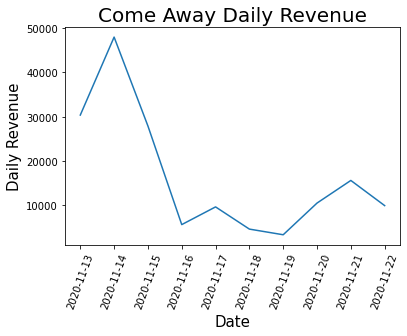

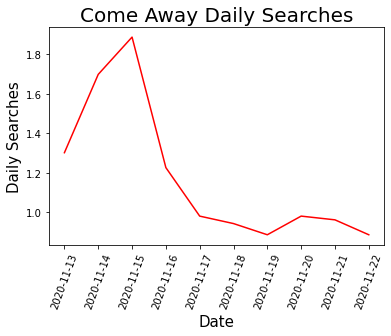

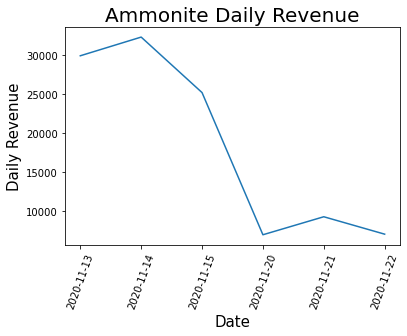

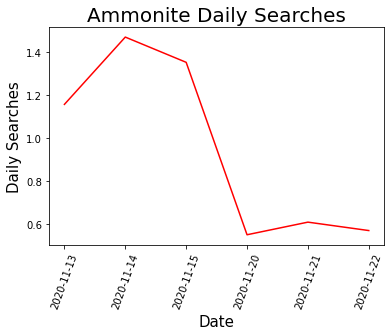

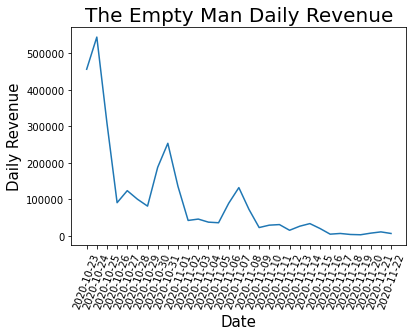

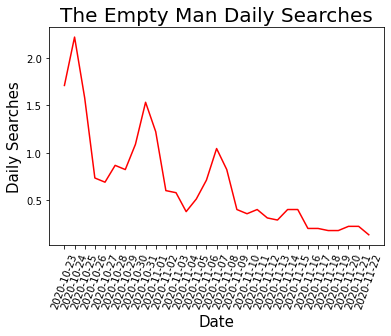

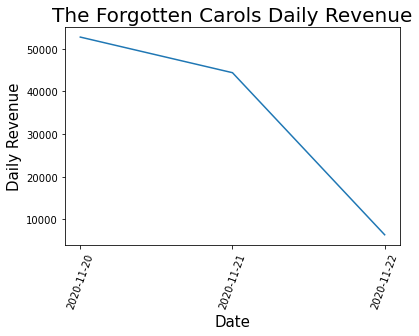

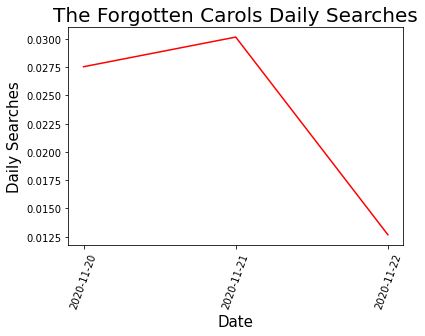

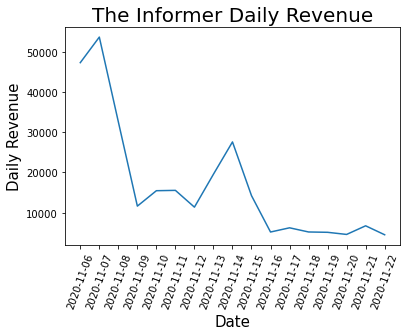

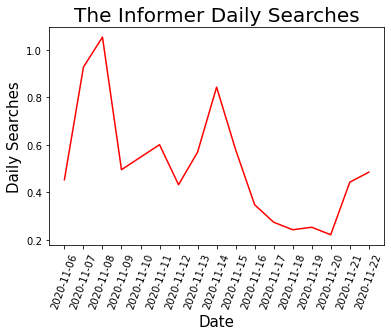

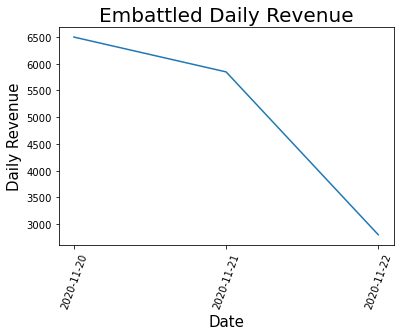

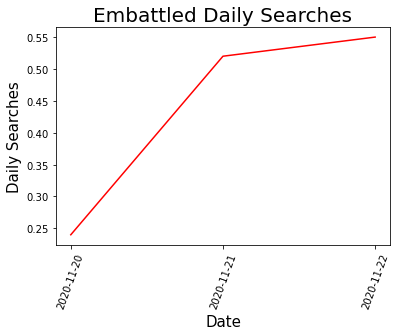

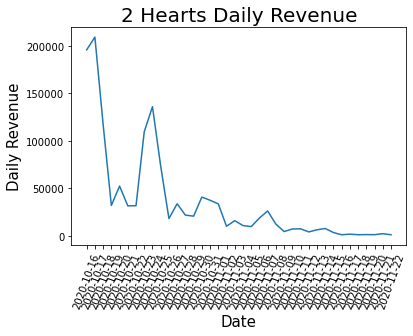

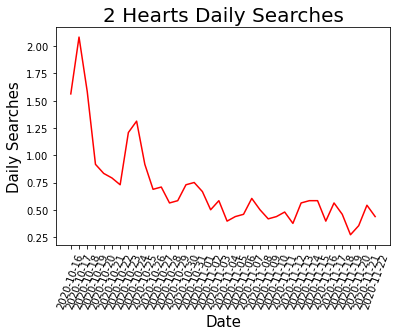

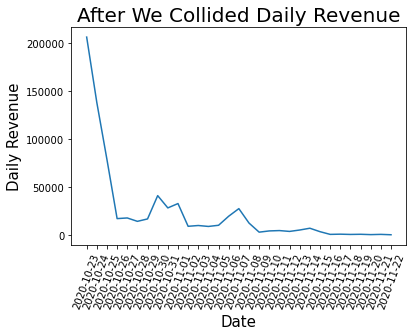

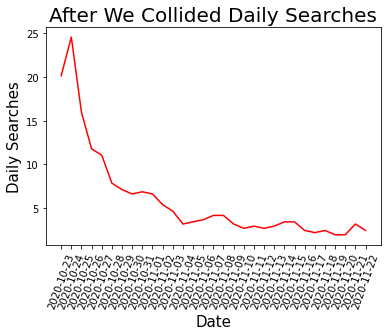

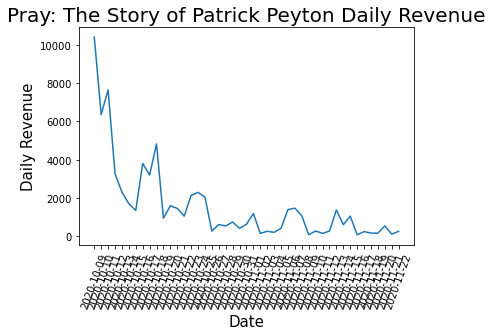

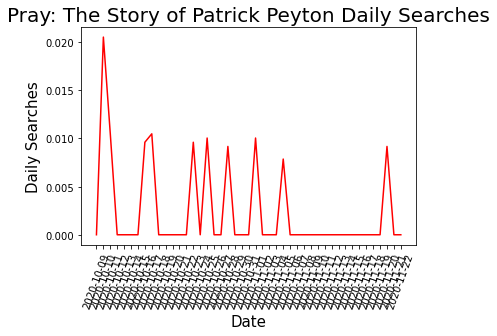

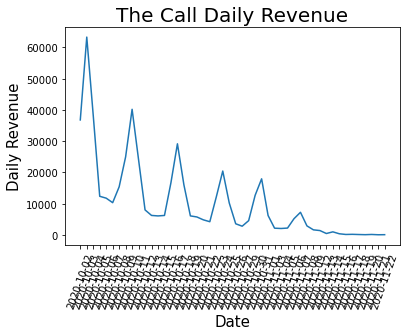

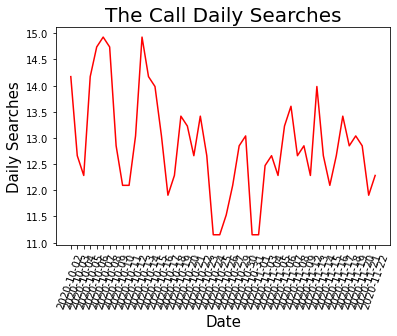

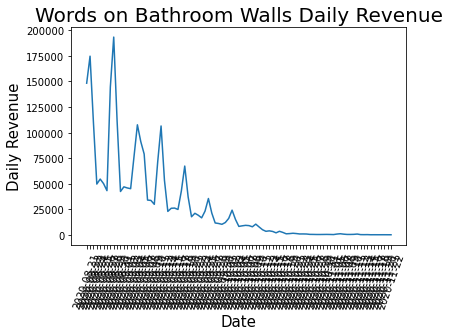

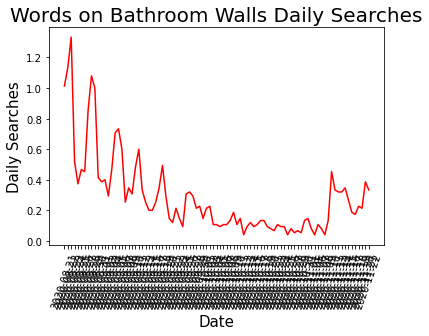

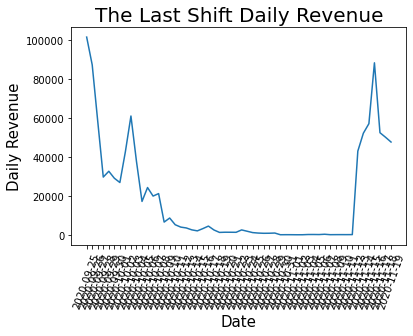

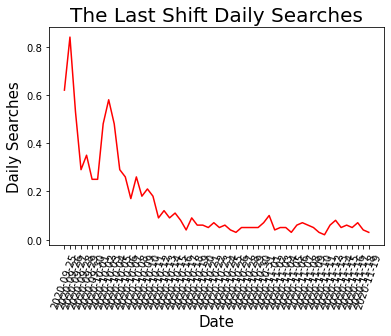

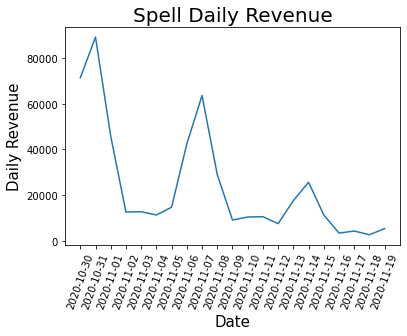

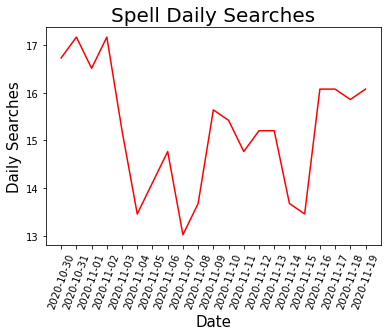

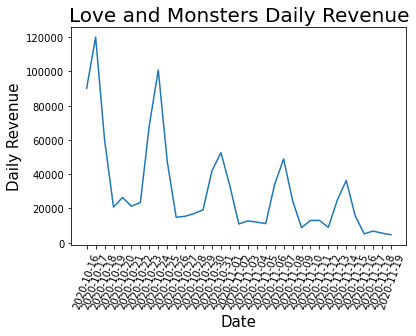

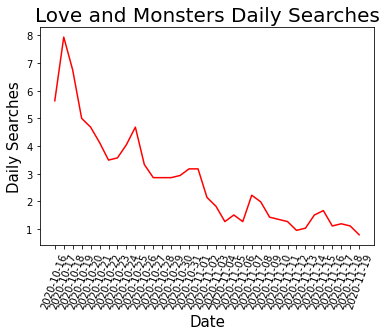

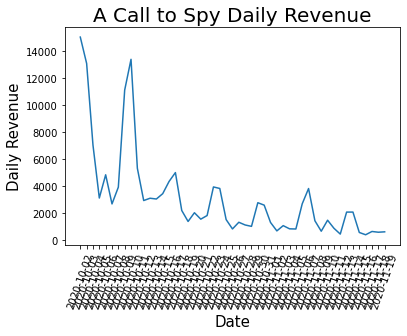

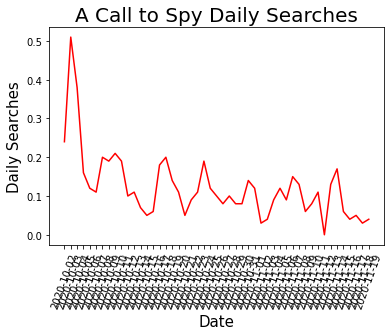

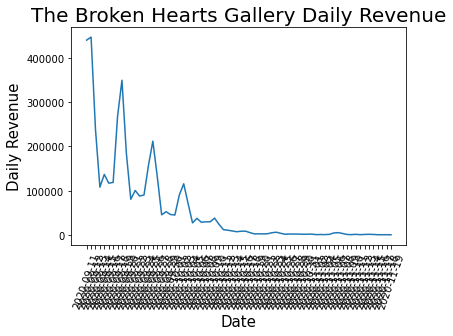

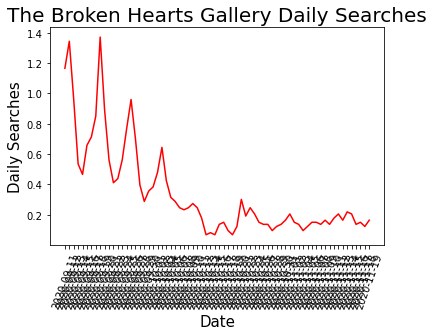

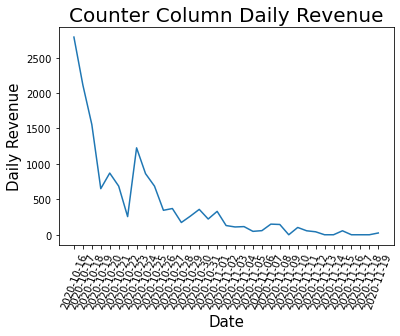

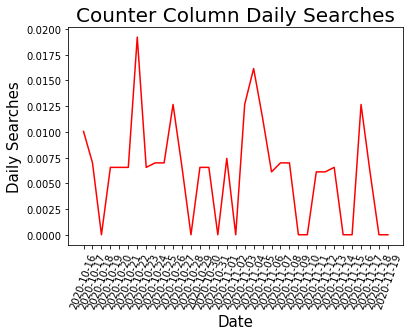

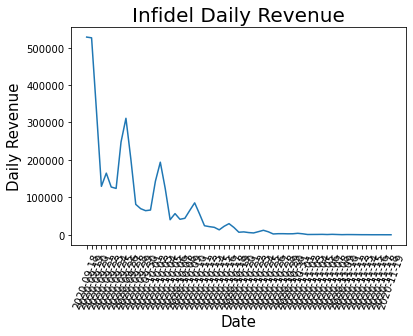

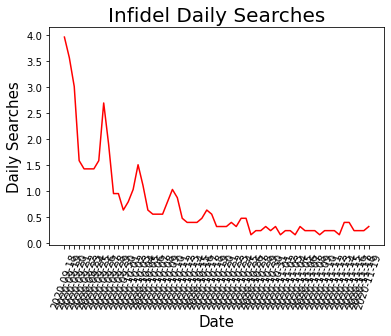

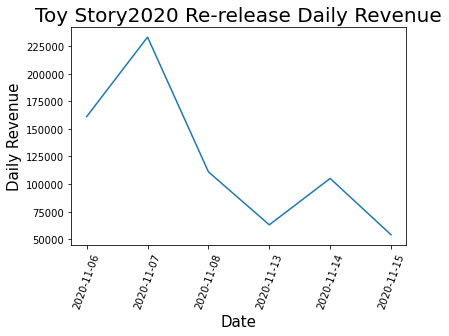

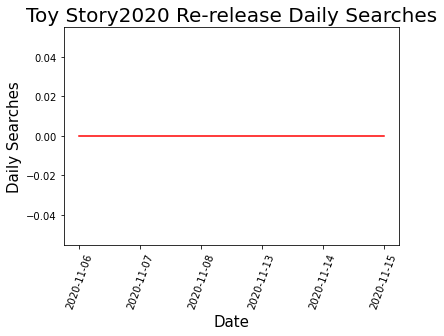

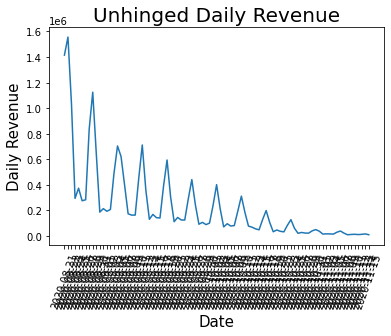

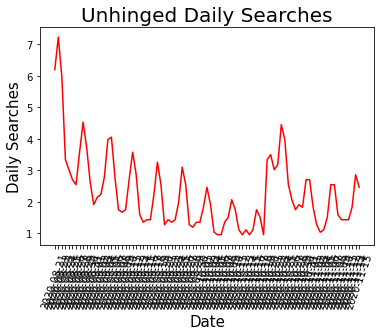

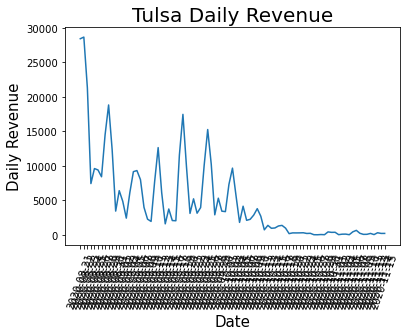

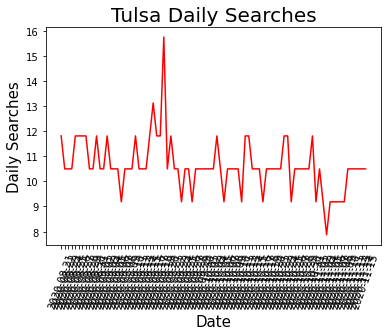

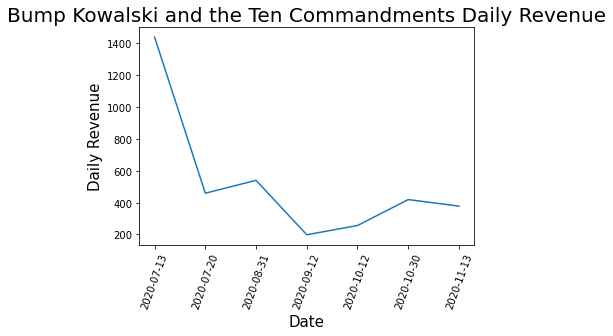

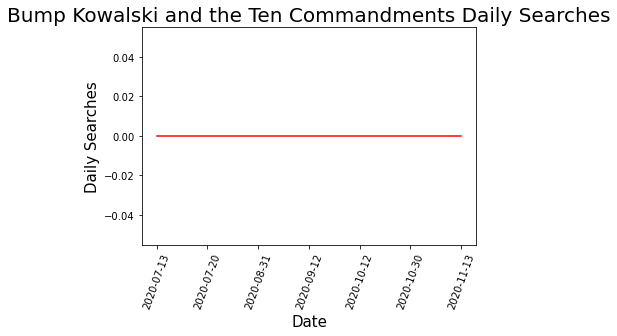

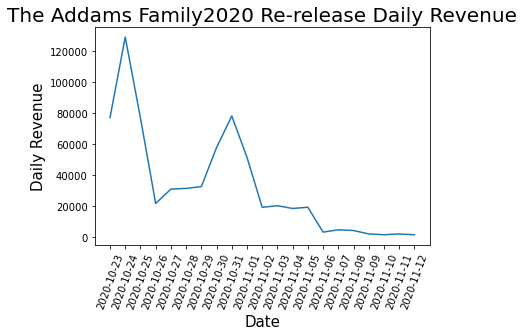

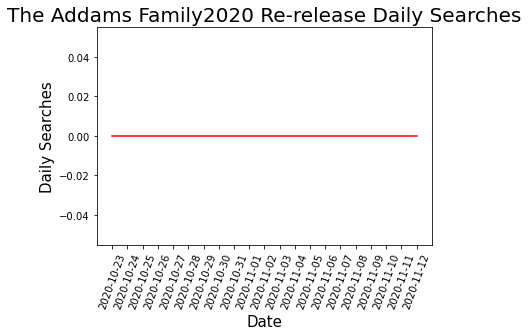

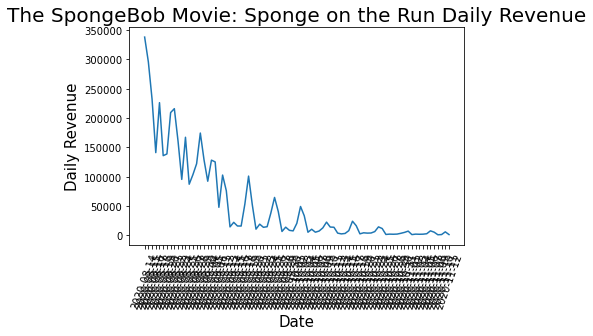

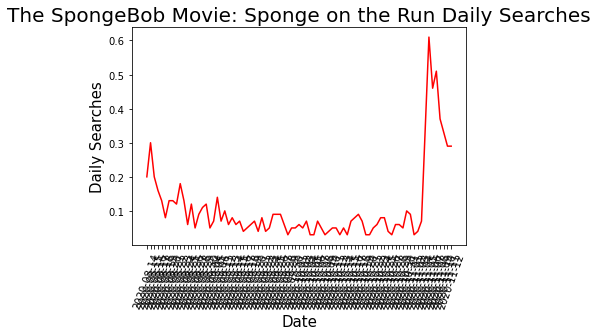

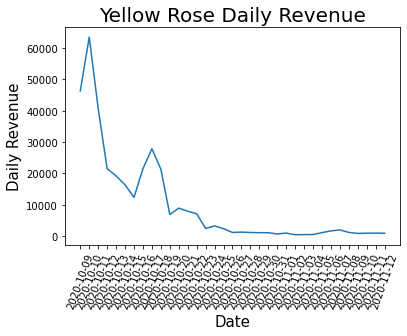

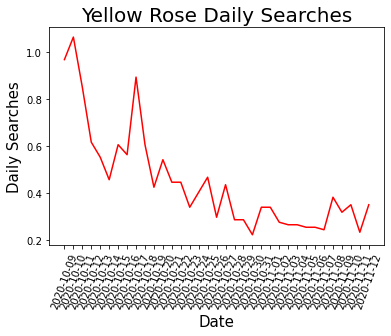

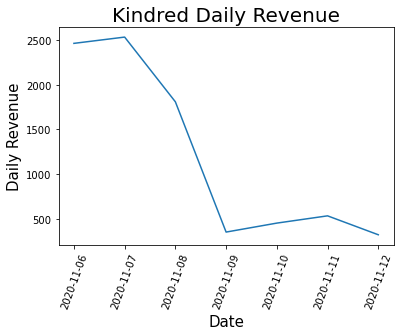

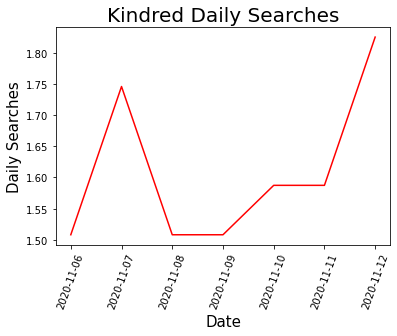

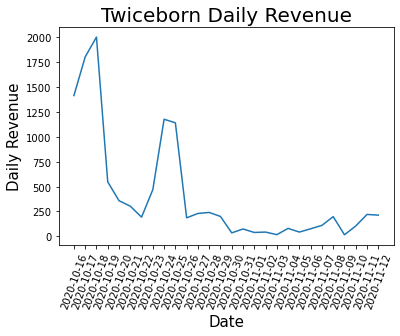

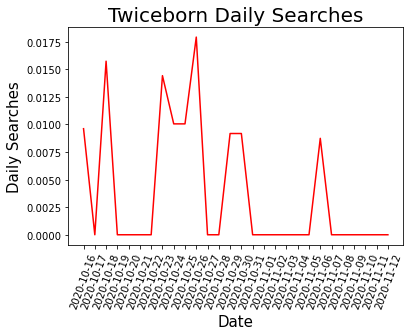

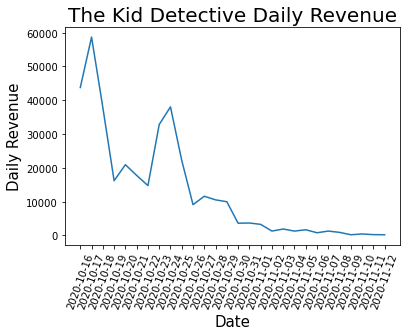

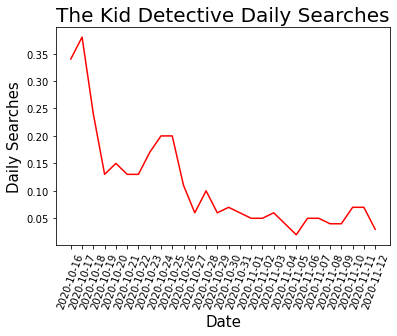

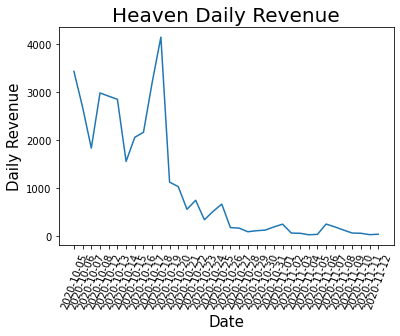

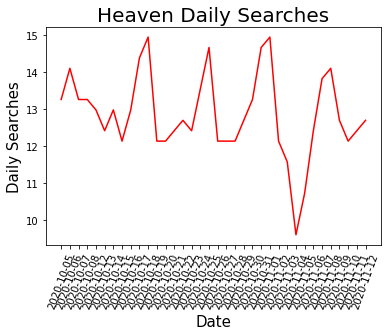

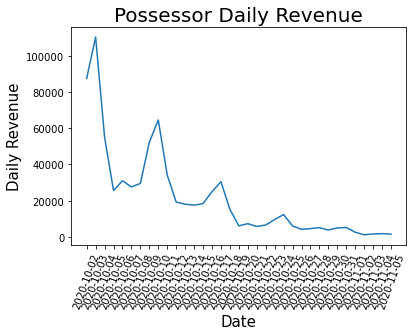

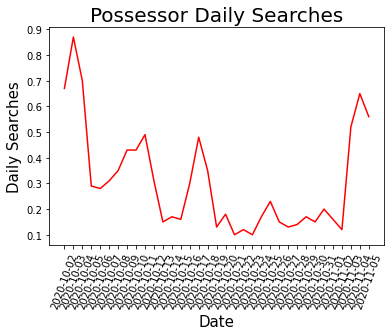

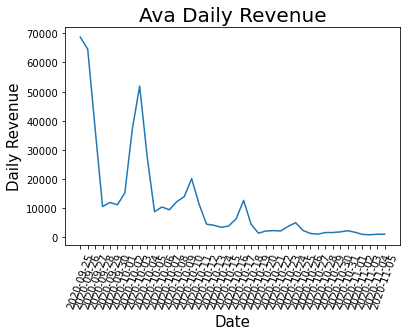

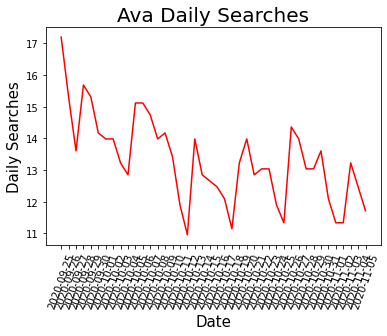

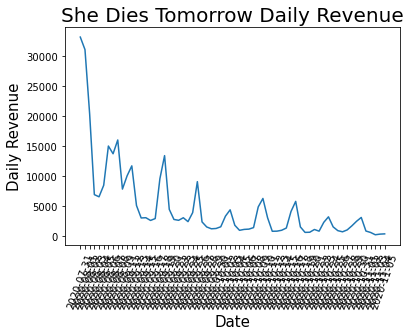

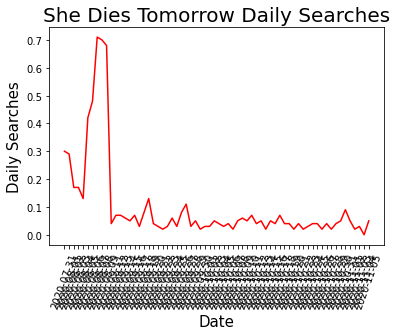

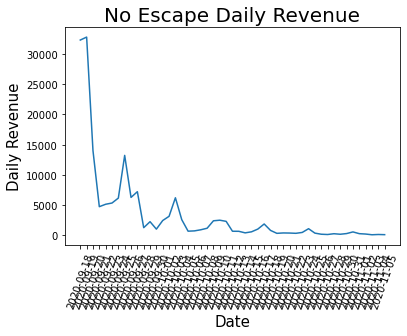

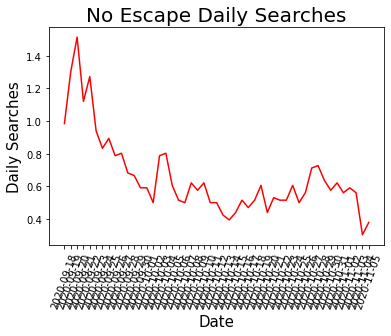

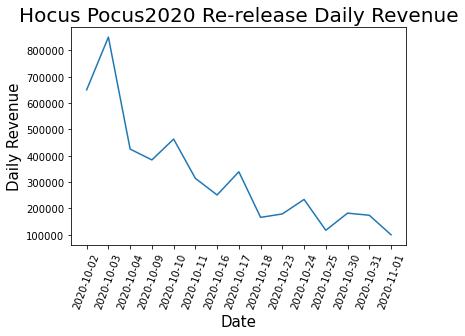

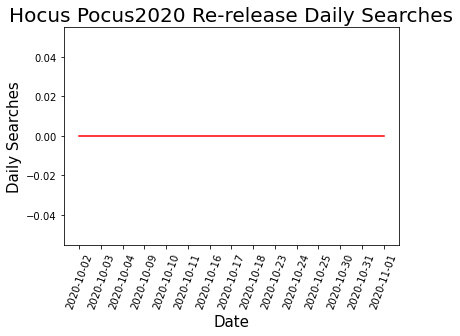

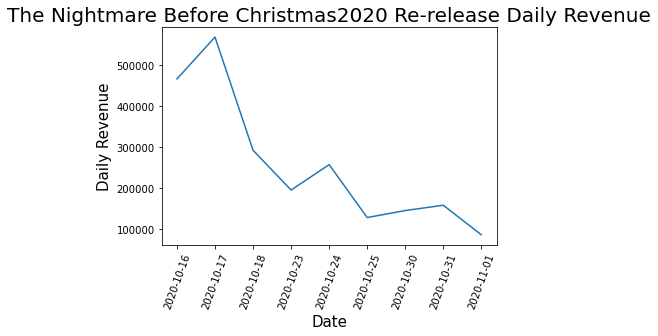

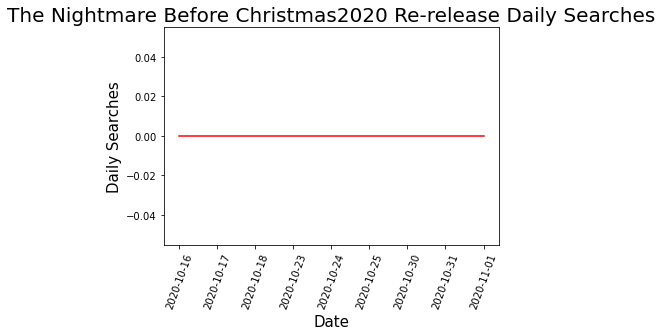

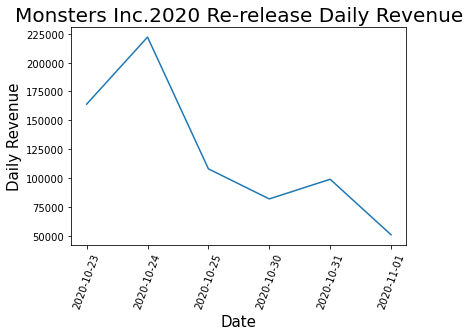

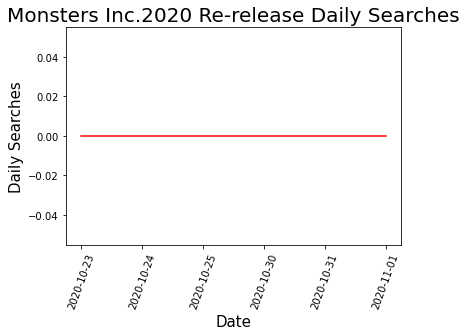

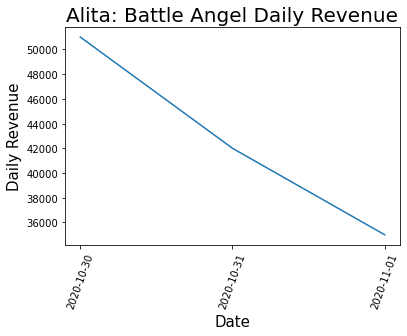

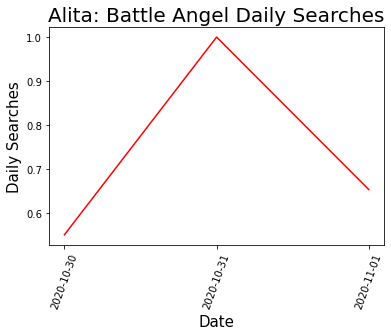

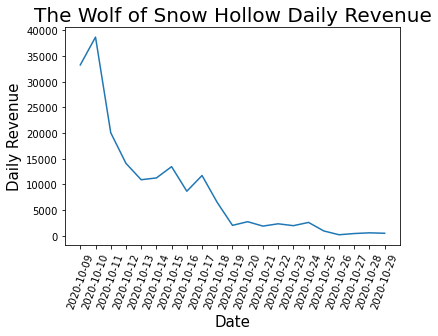

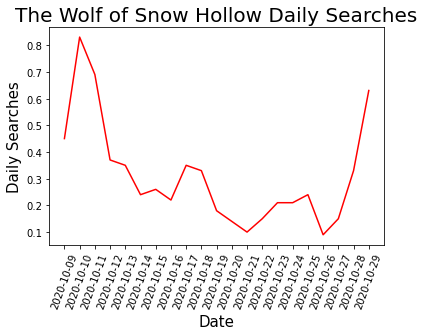

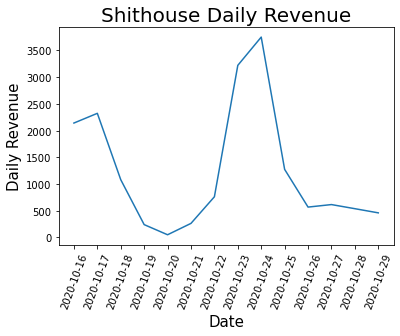

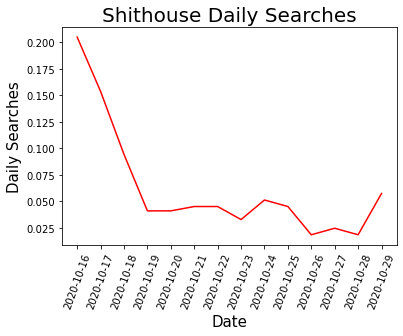

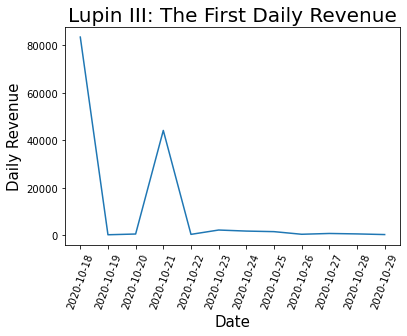

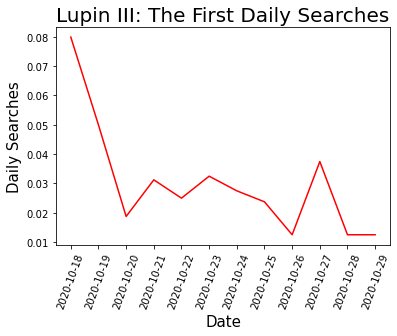

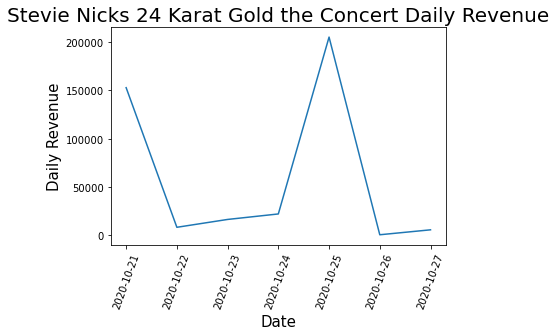

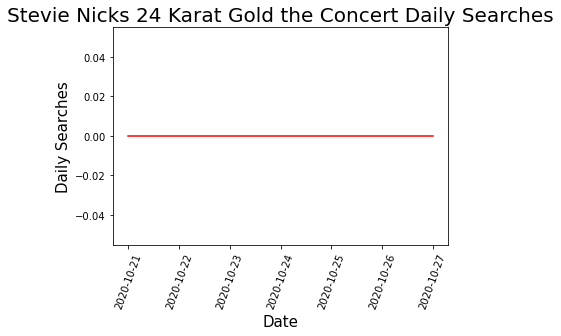

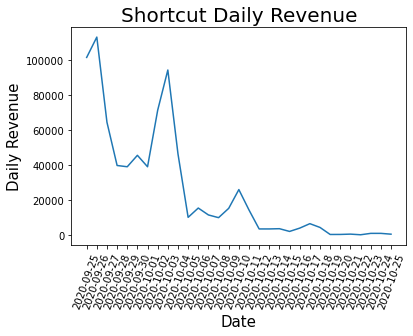

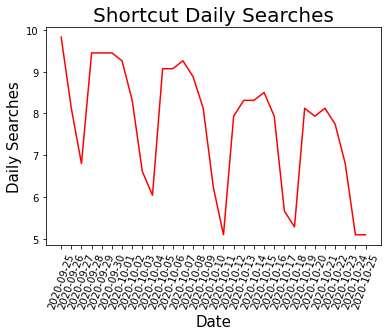

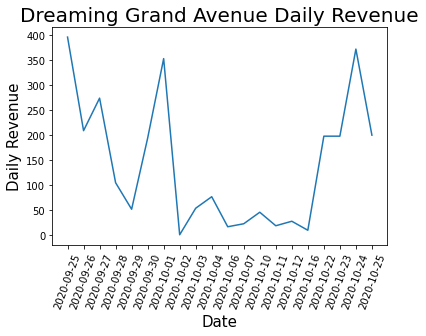

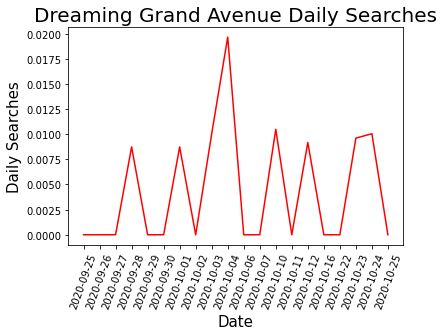

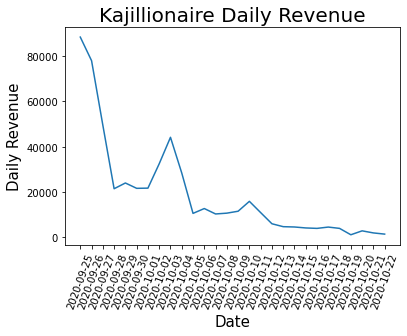

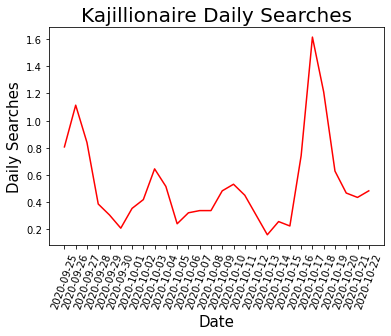

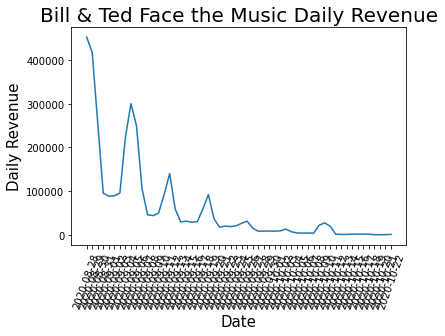

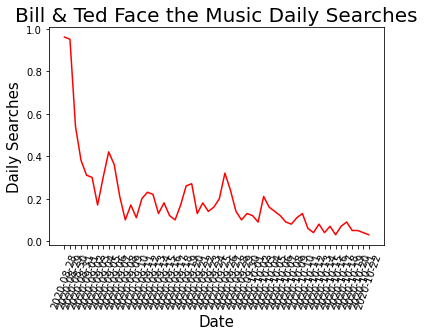

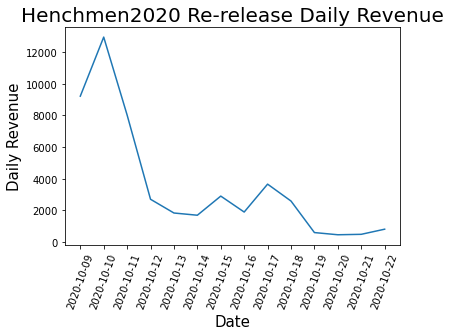

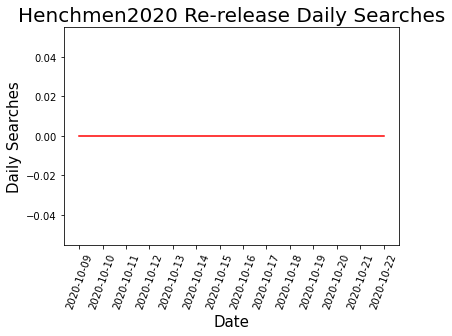

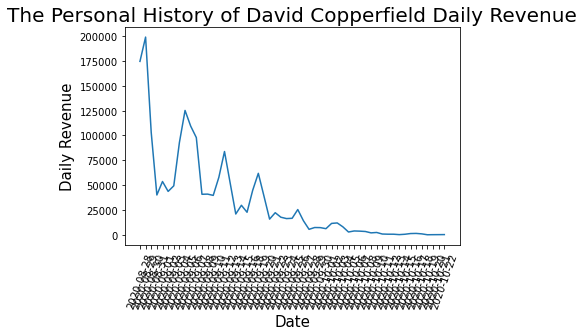

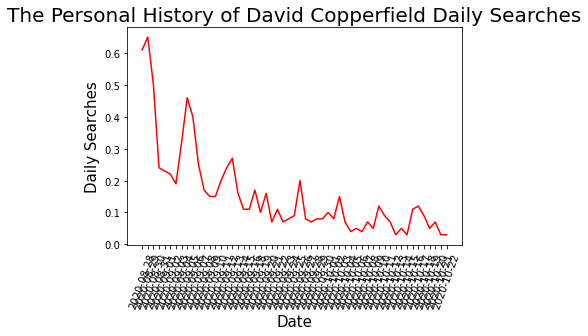

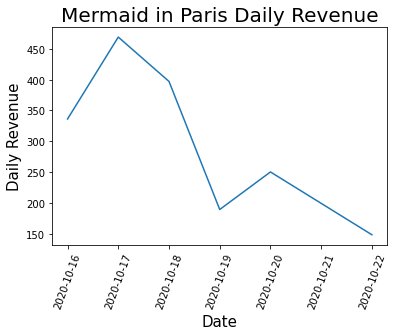

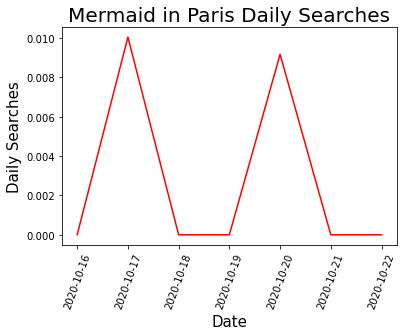

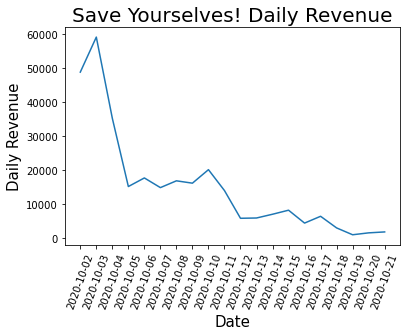

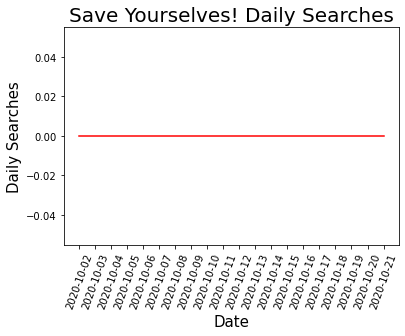

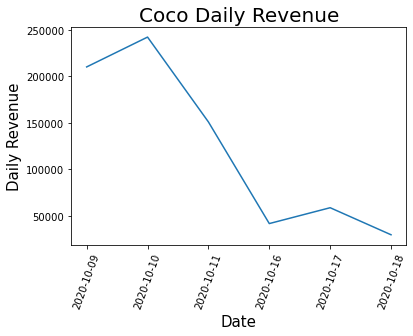

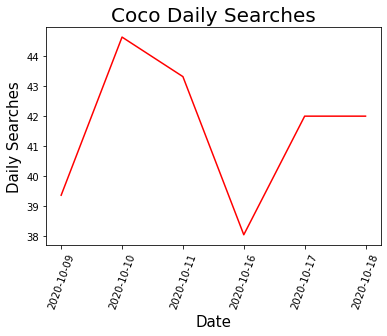

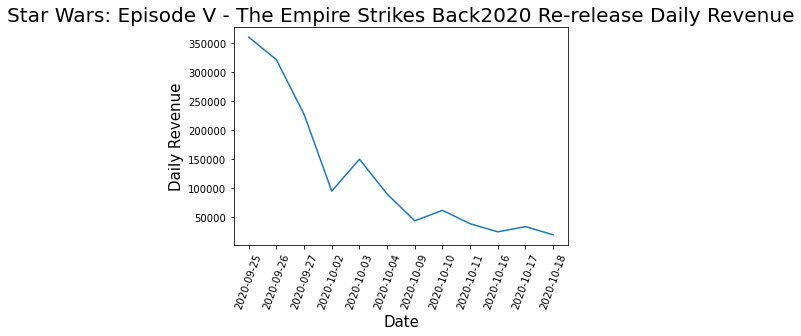

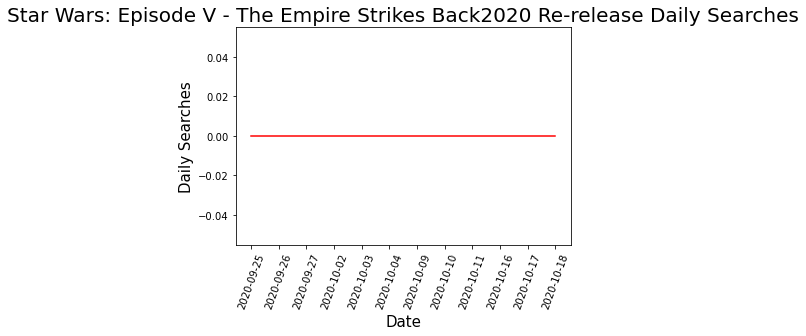

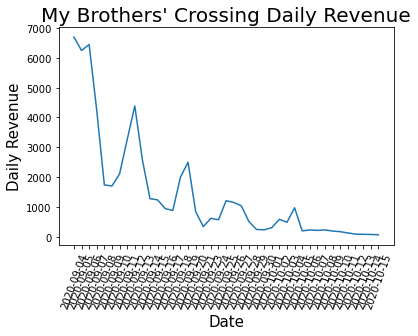

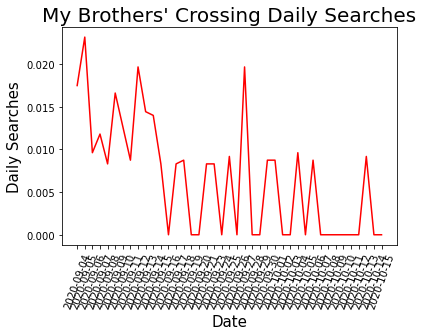

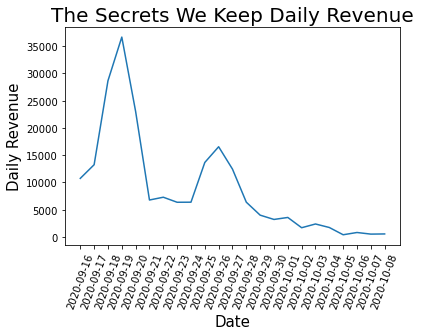

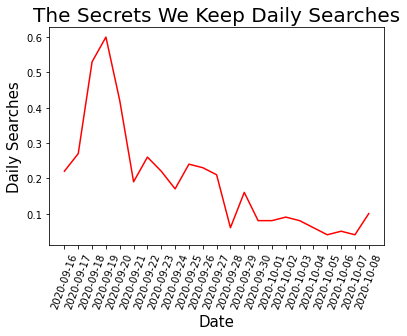

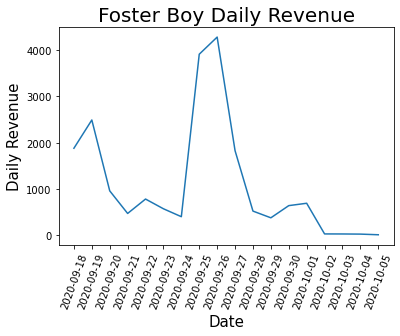

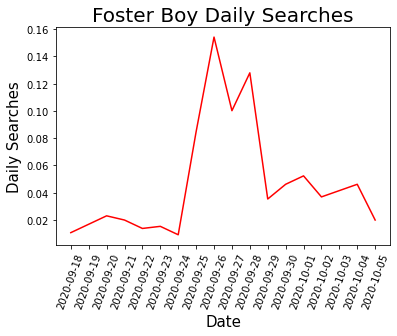

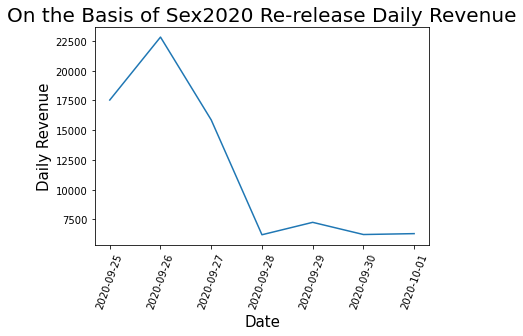

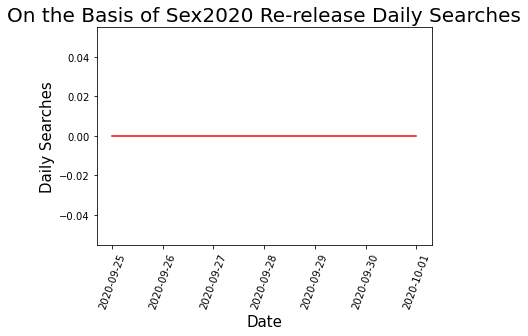

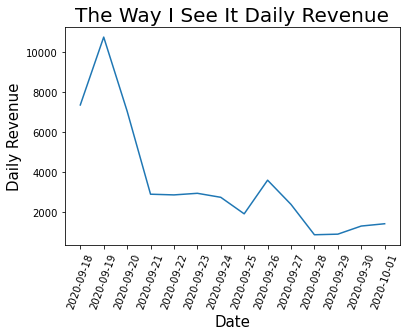

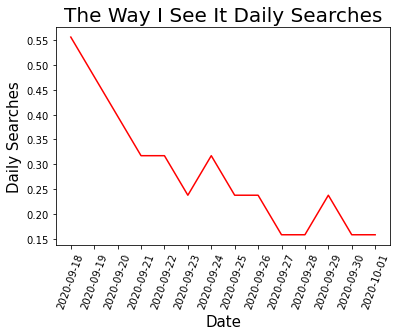

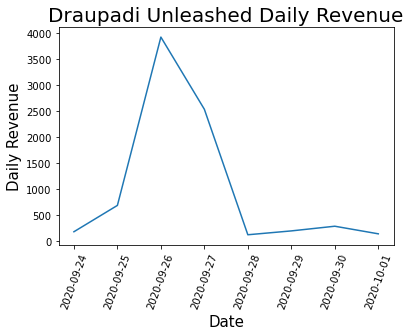

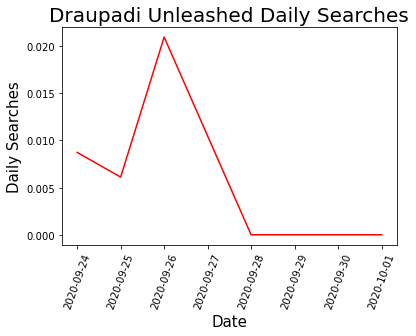

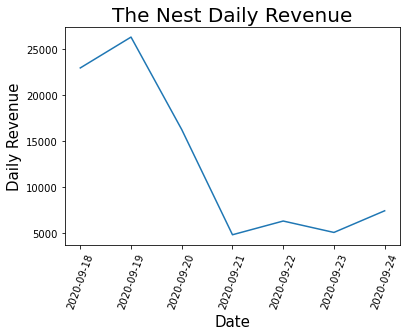

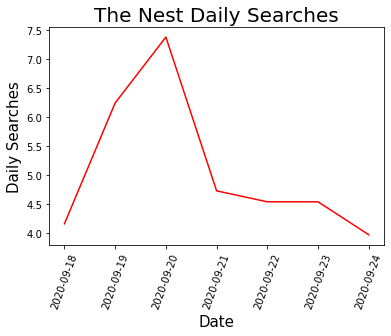

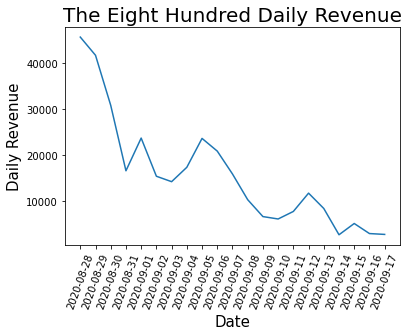

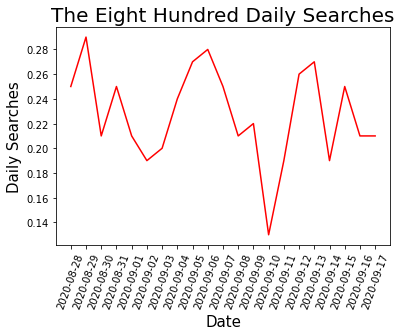

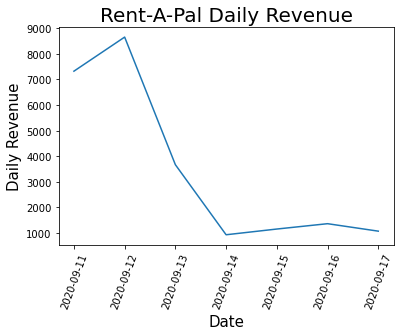

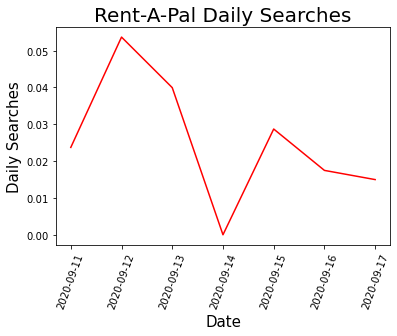

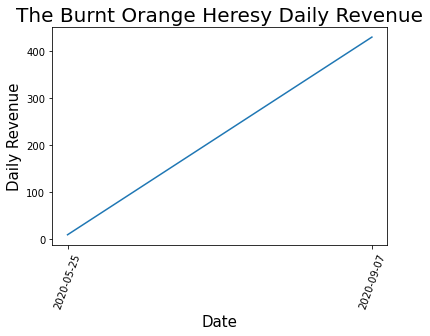

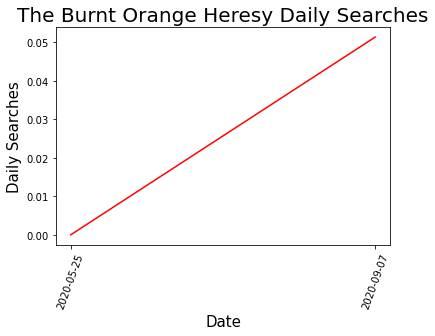

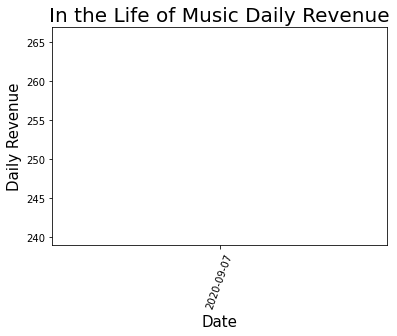

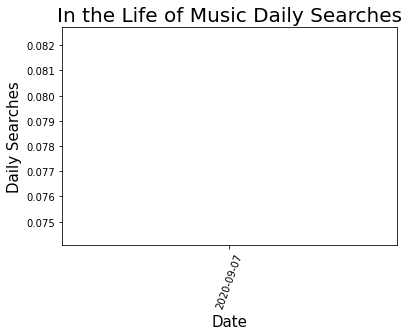

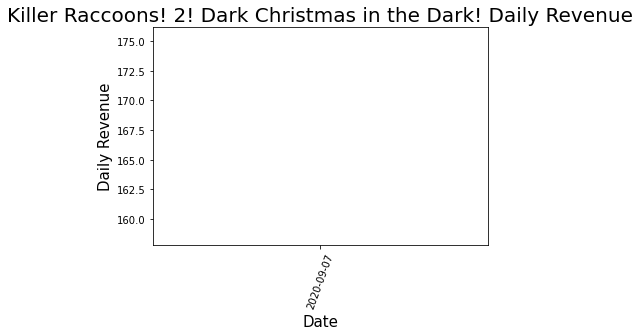

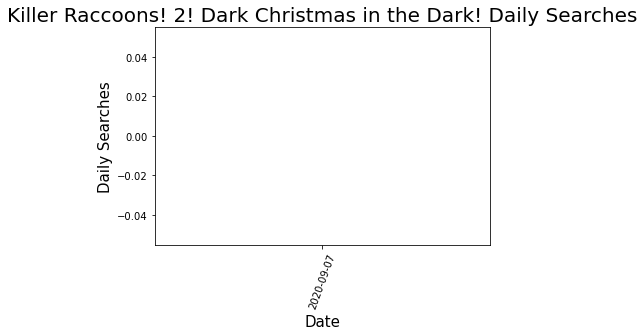

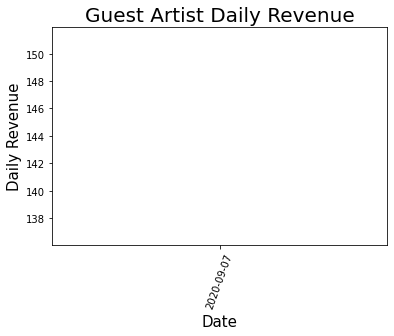

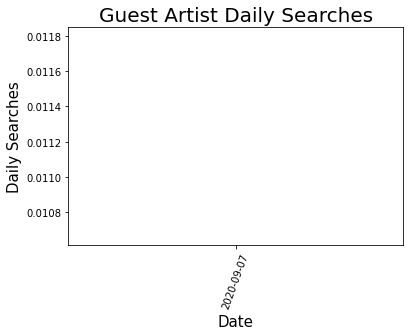

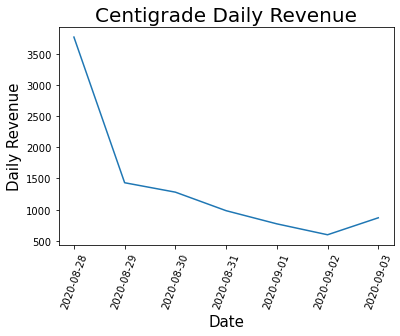

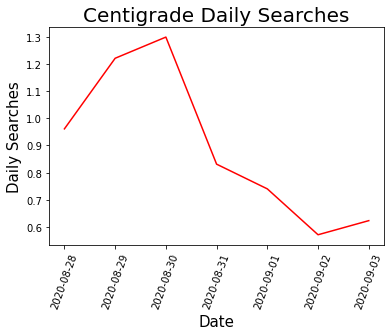

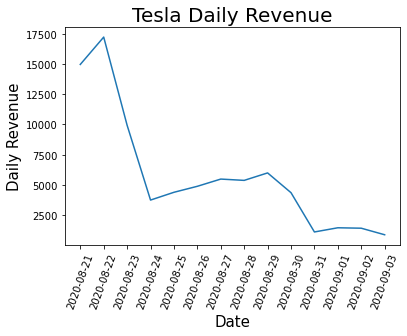

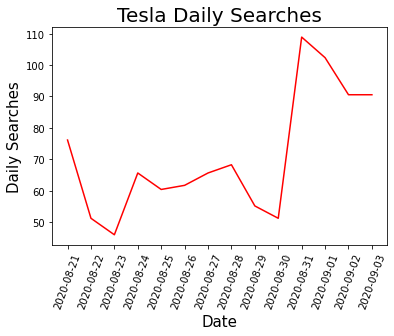

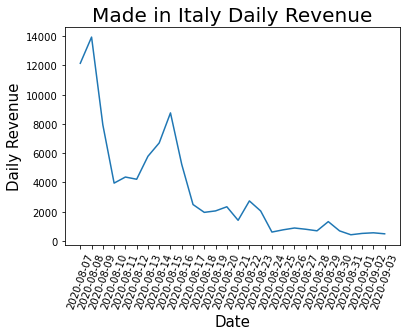

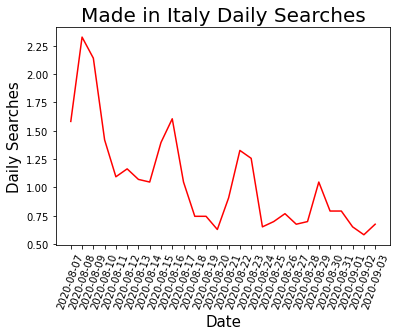

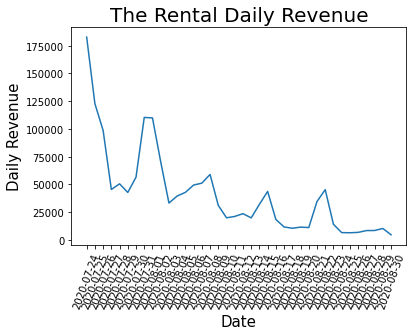

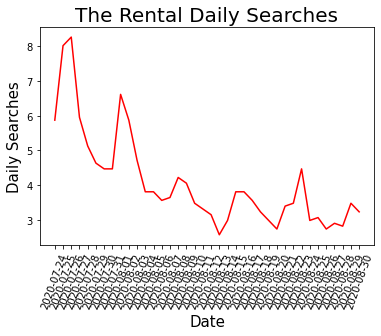

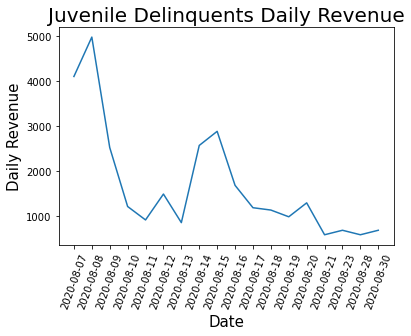

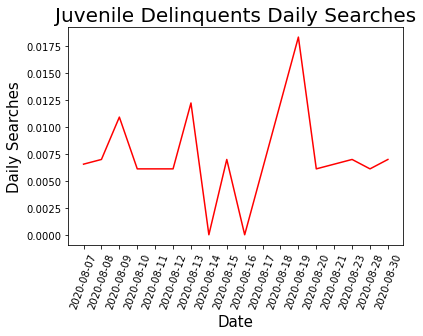

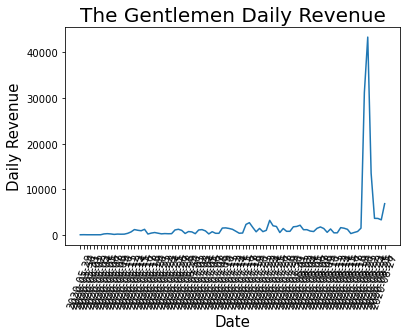

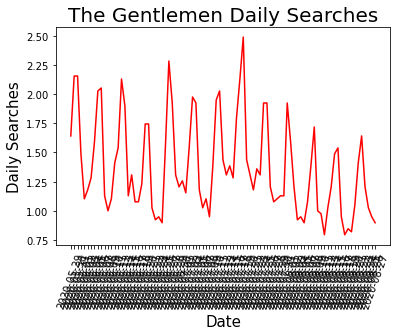

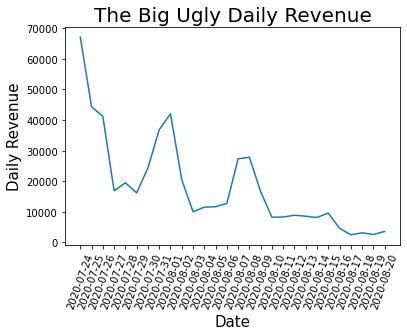

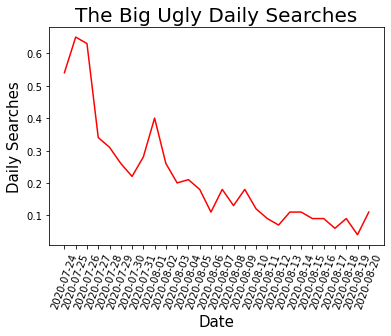

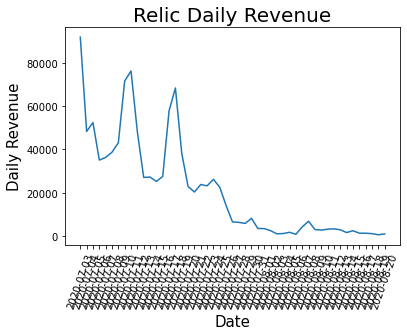

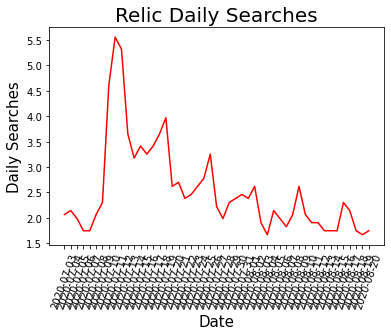

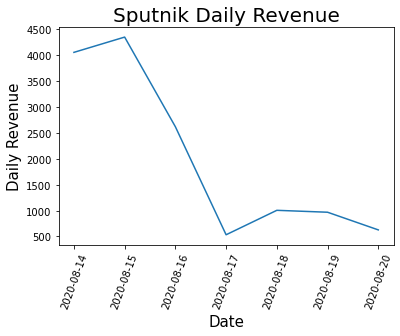

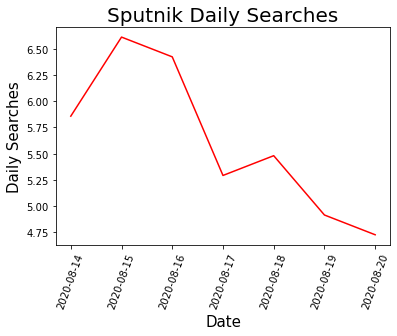

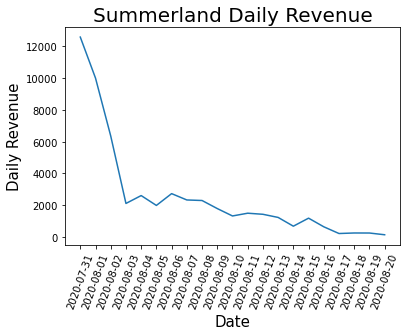

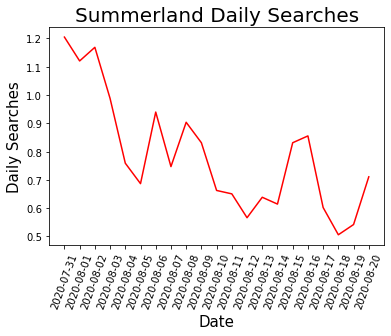

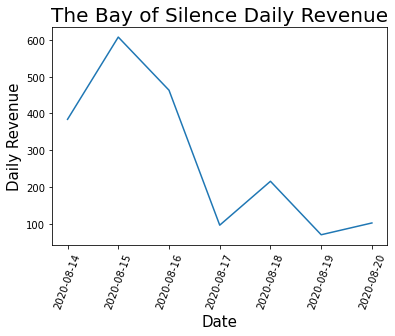

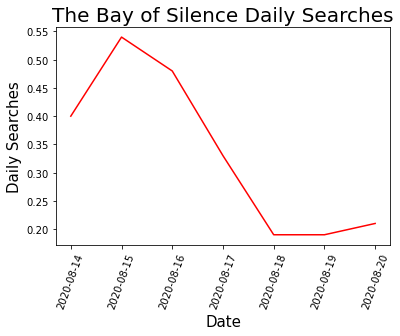

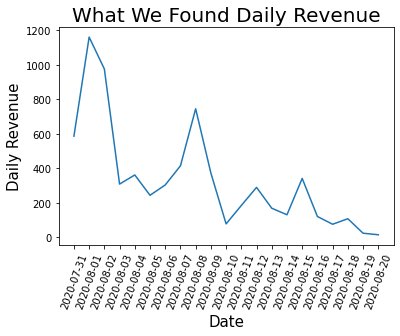

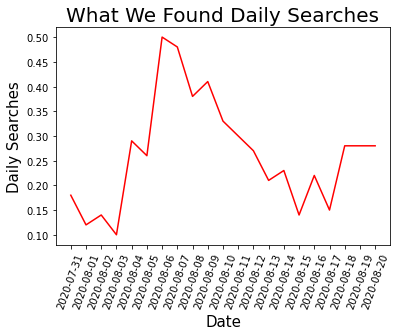

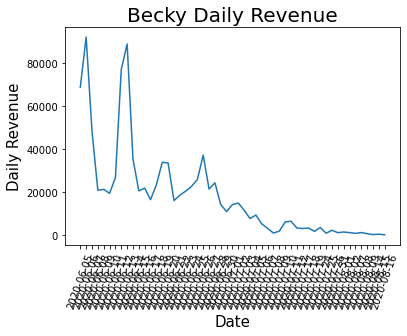

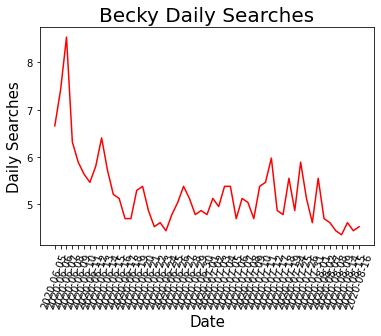

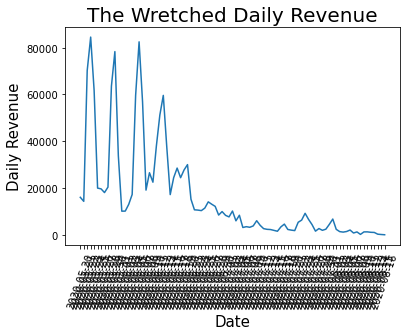

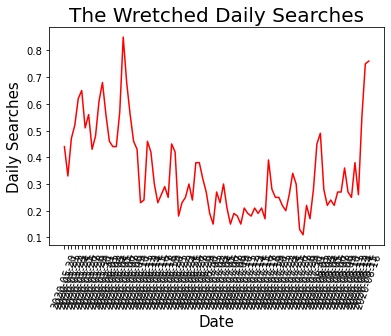

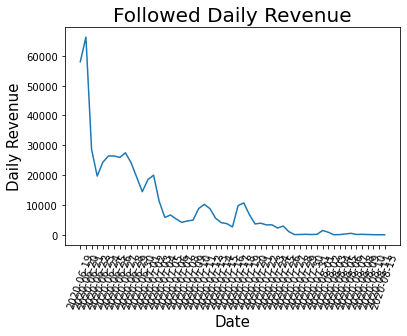

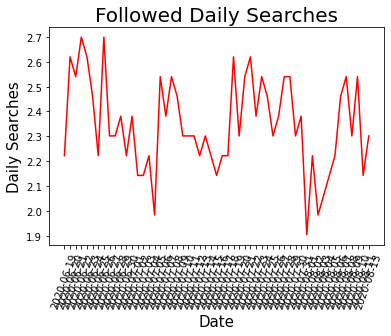

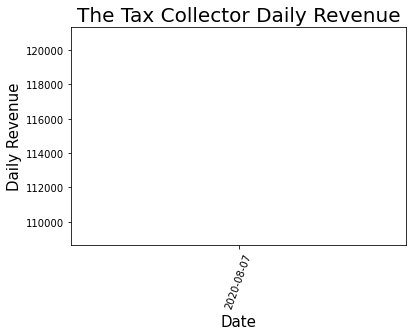

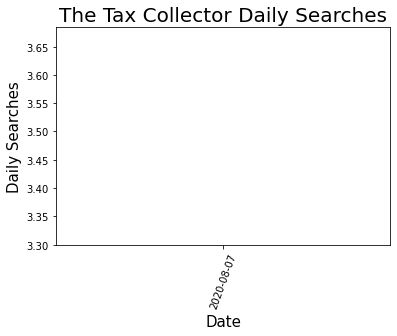

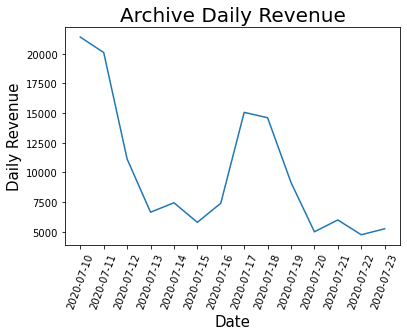

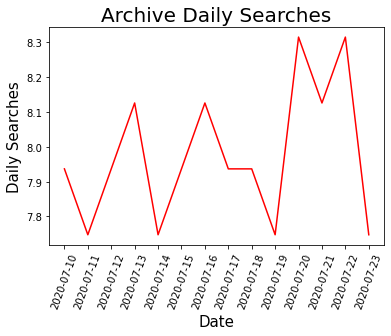

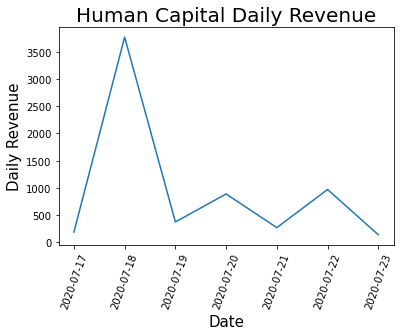

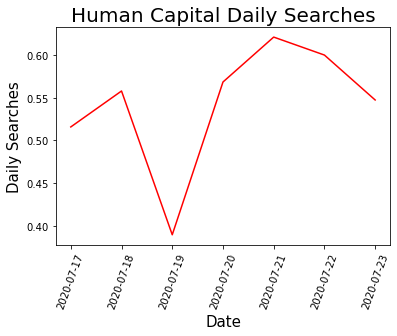

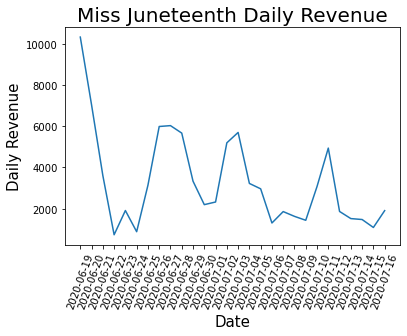

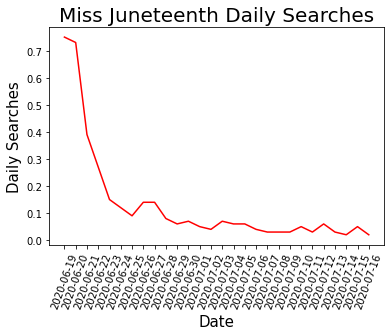

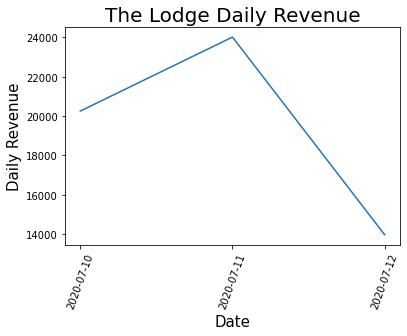

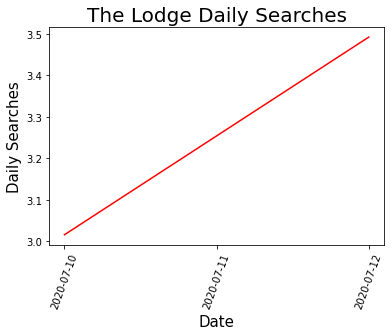

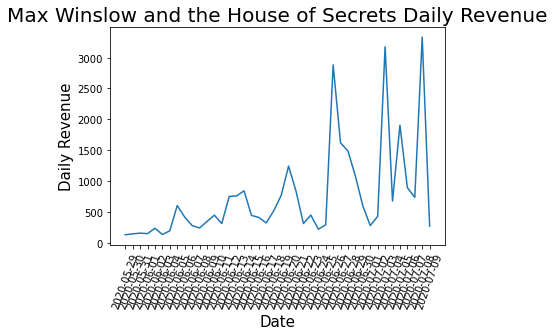

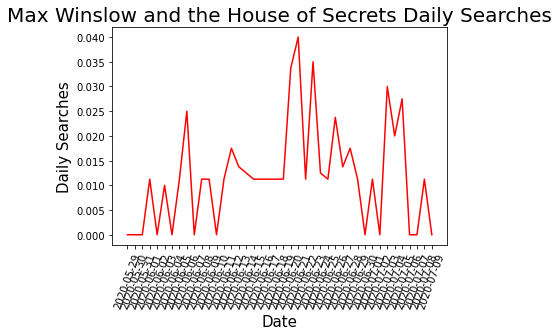

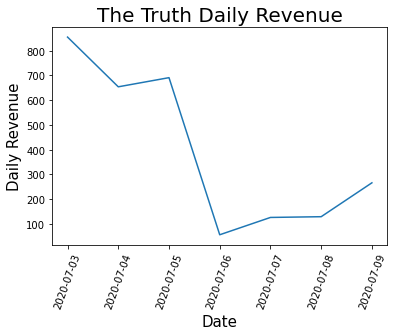

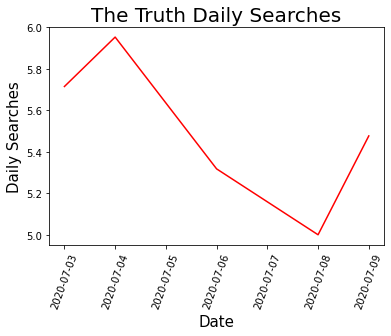

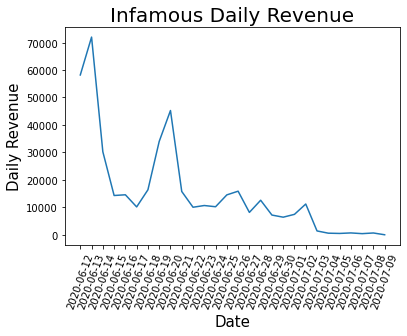

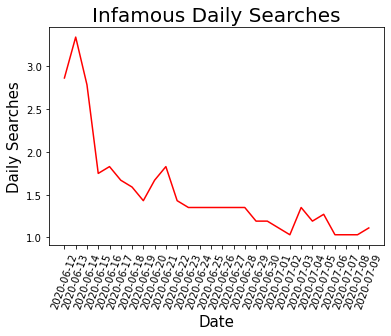

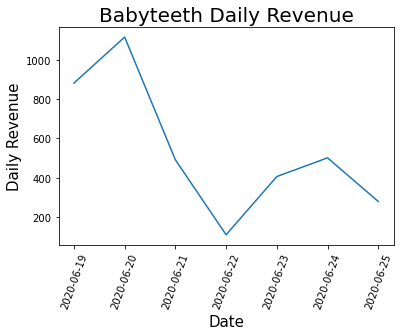

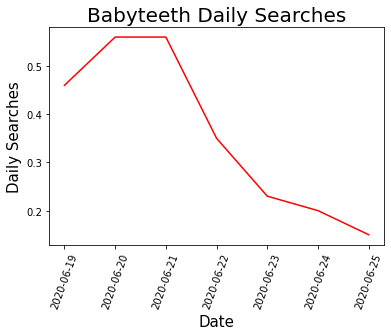

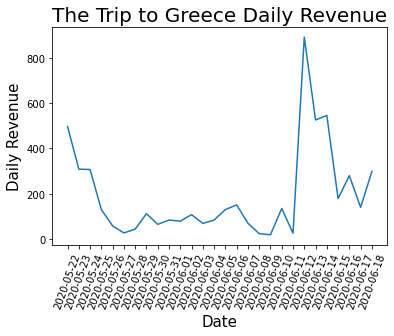

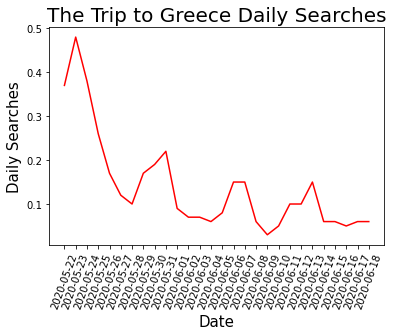

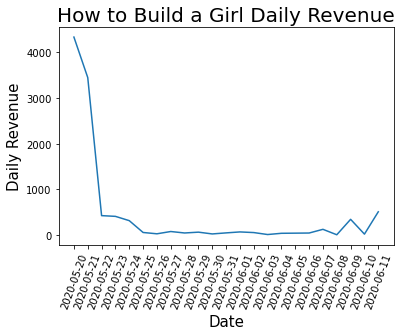

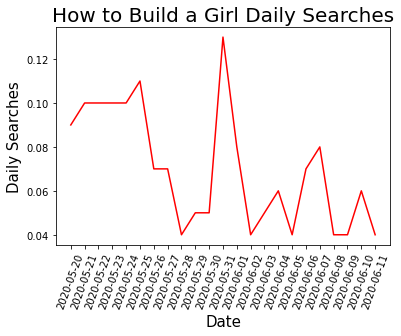

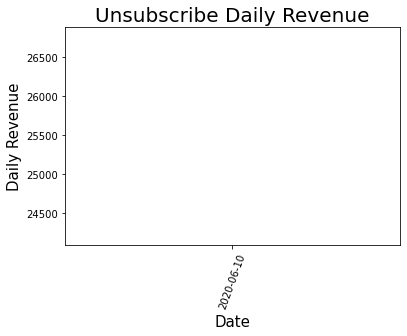

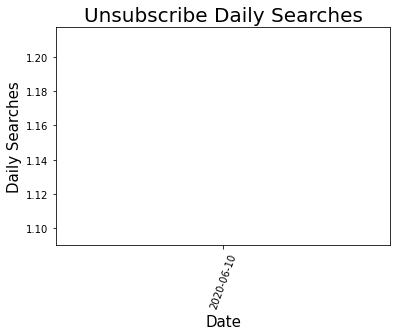

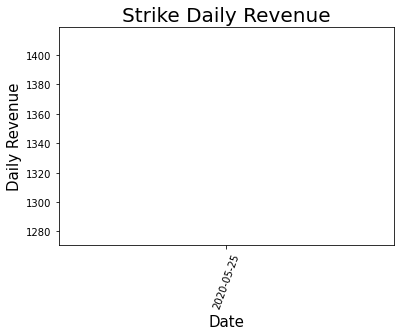

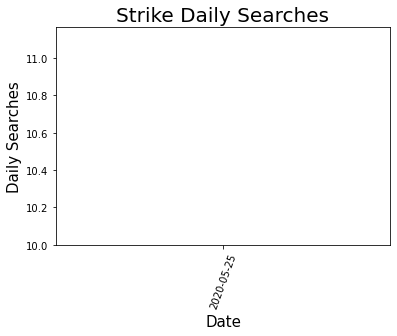

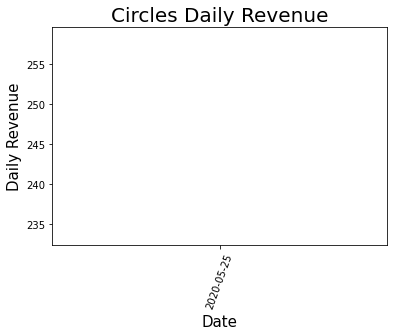

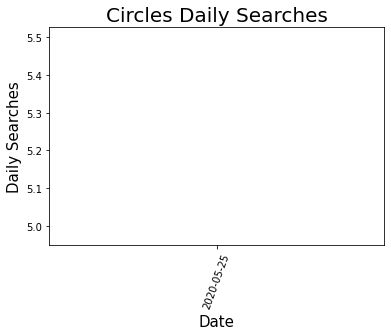

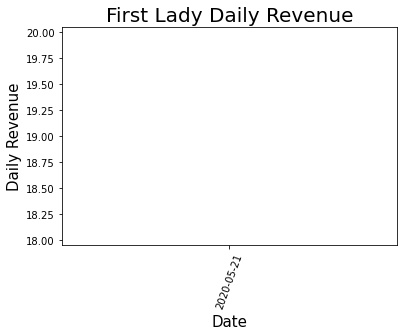

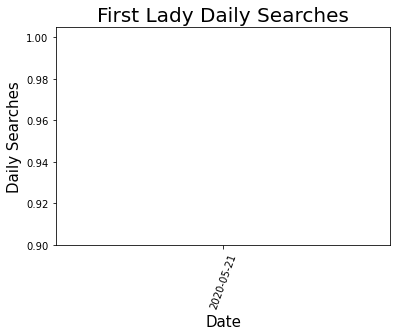

In [235]:
for movie in df['Release'].unique():
    plt.plot(df[df['Release'] == movie]['Date'][::-1], df[df['Release'] == movie]['Daily'][::-1])
    plt.xticks(rotation = 70)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Daily Revenue', fontsize= 15)
    plt.title(f'{movie} Daily Revenue', fontsize=20)
    plt.show()
    plt.plot(df[df['Release'] == movie]['Date'][::-1], df[df['Release'] == movie]['google trends'][::-1], color='r')
    plt.xticks(rotation = 70)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Daily Searches', fontsize= 15)
    plt.title(f'{movie} Daily Searches', fontsize=20)
    plt.show()

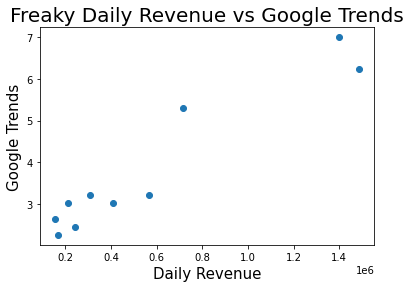

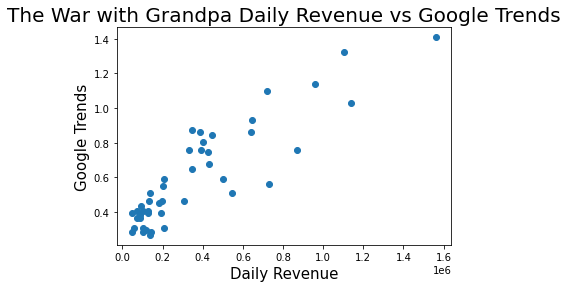

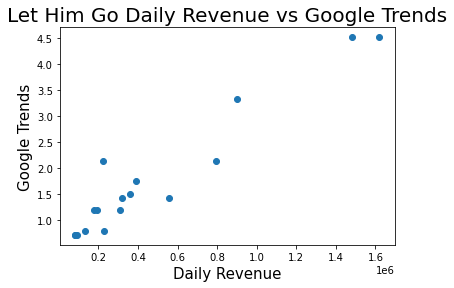

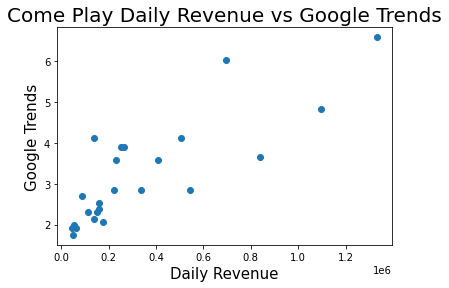

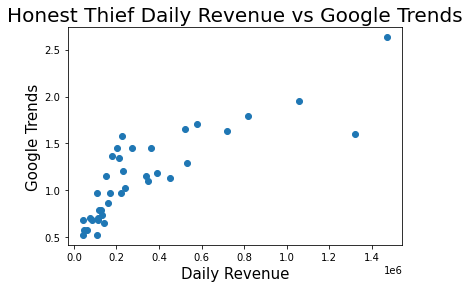

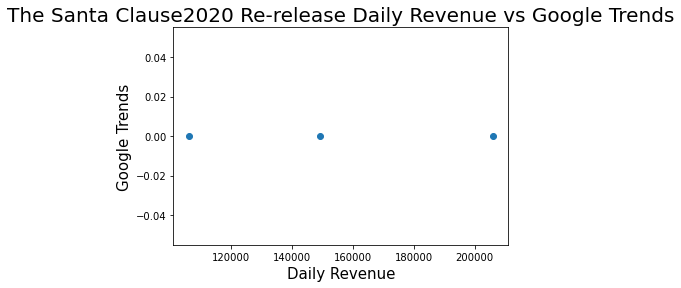

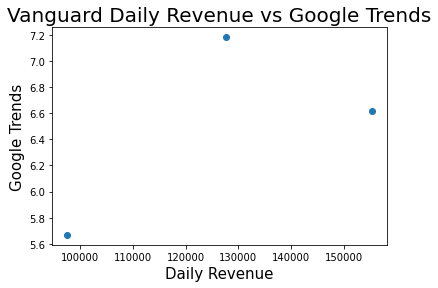

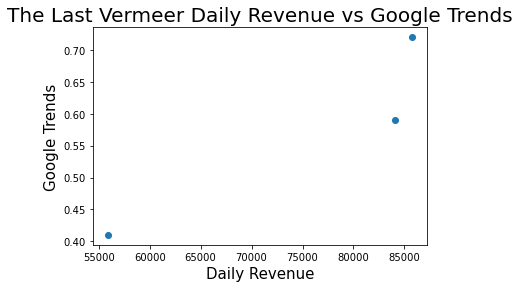

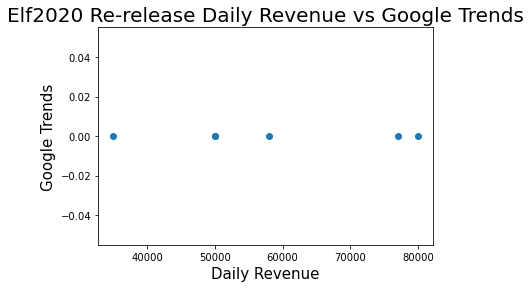

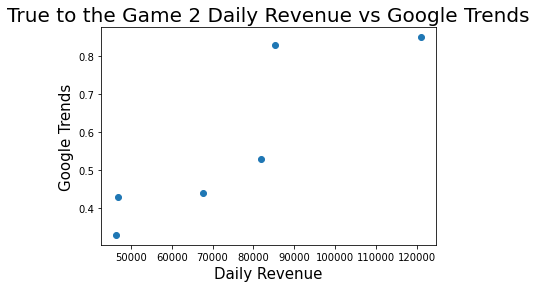

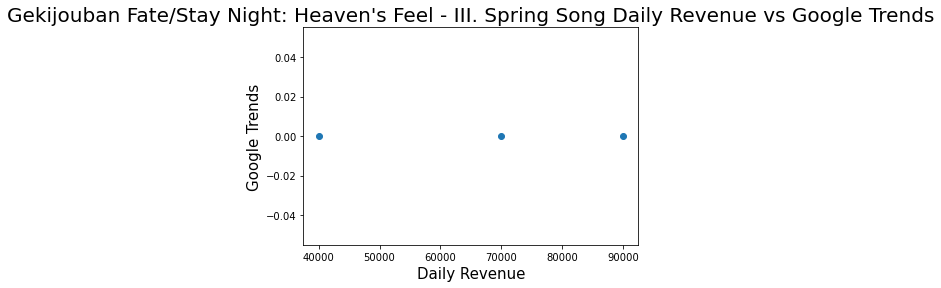

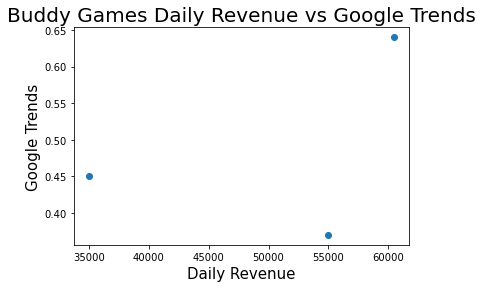

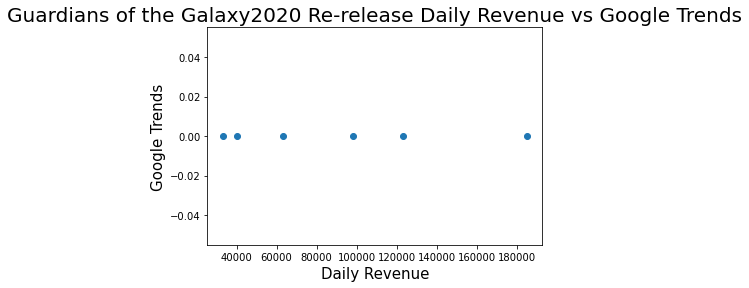

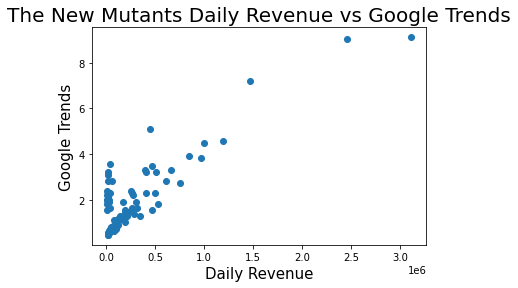

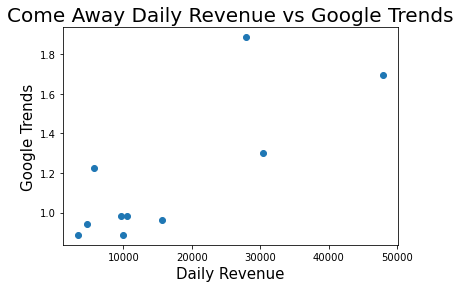

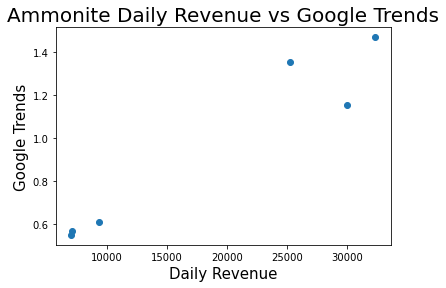

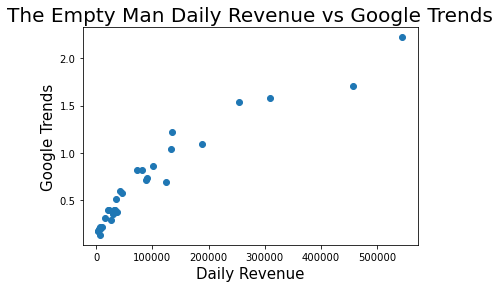

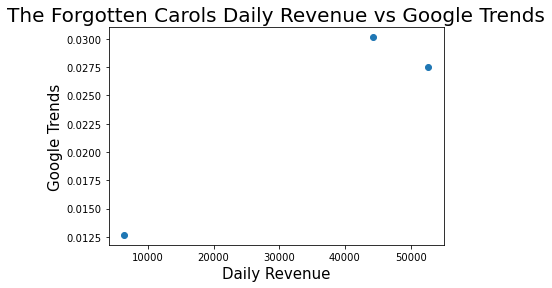

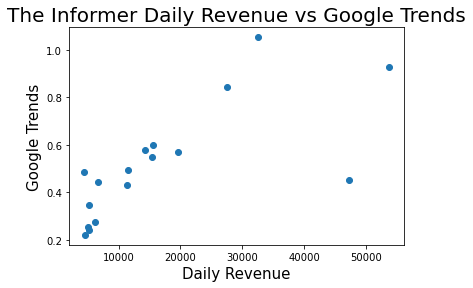

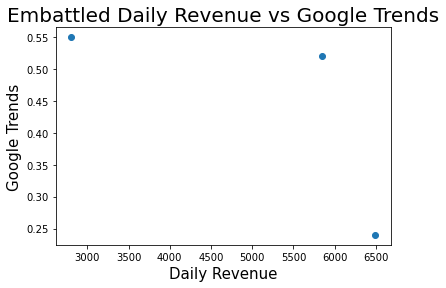

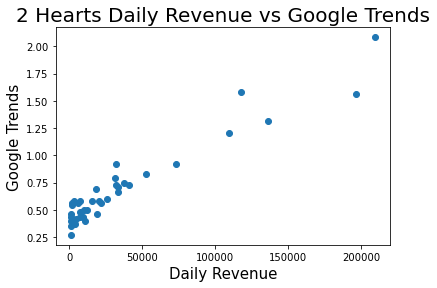

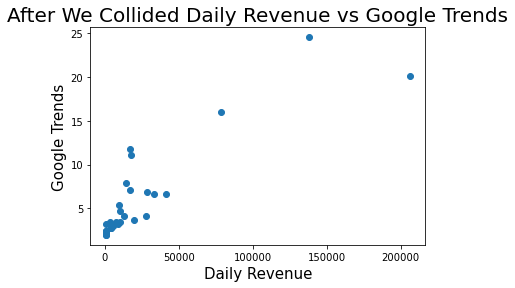

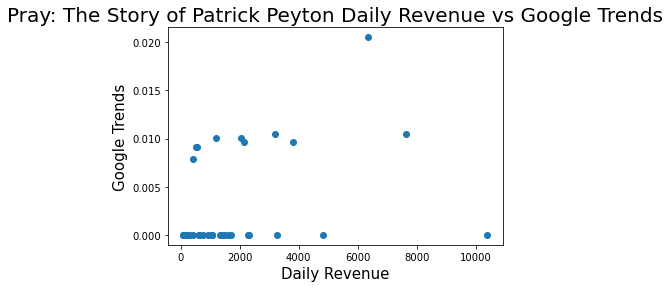

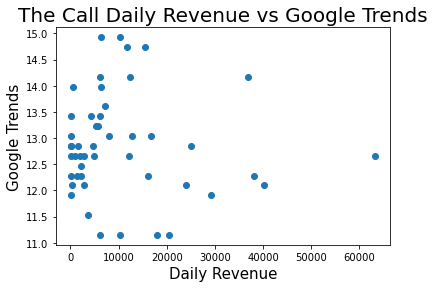

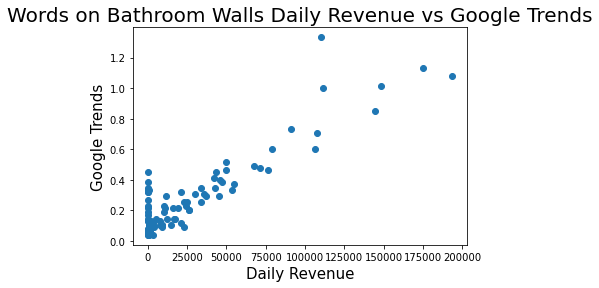

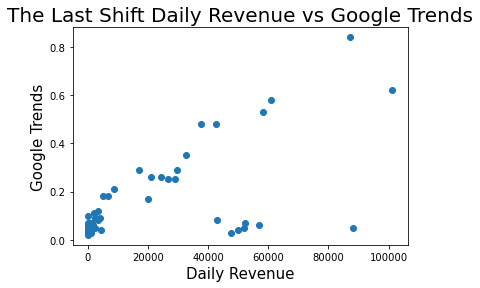

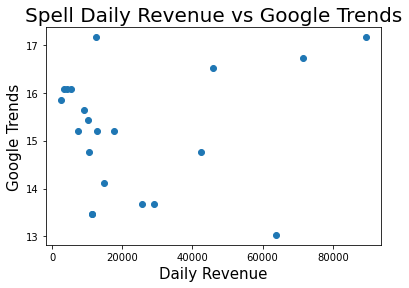

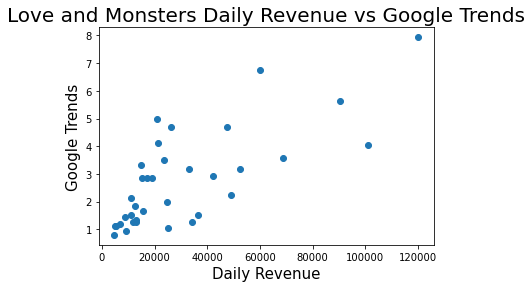

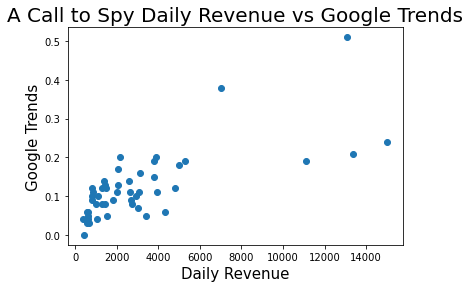

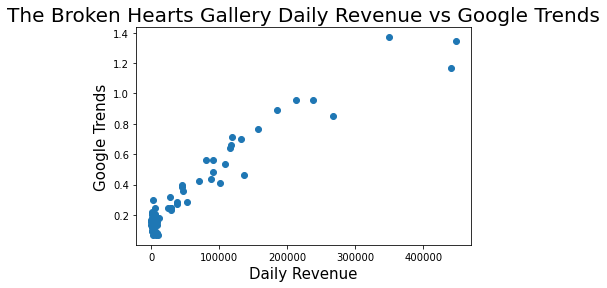

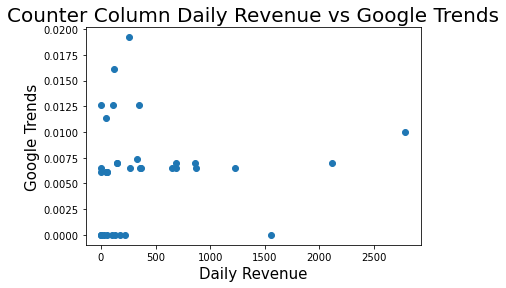

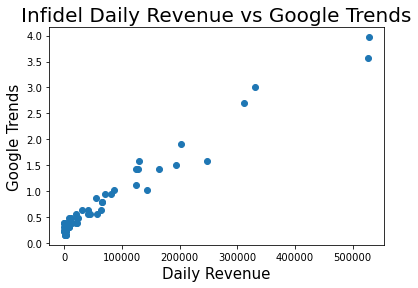

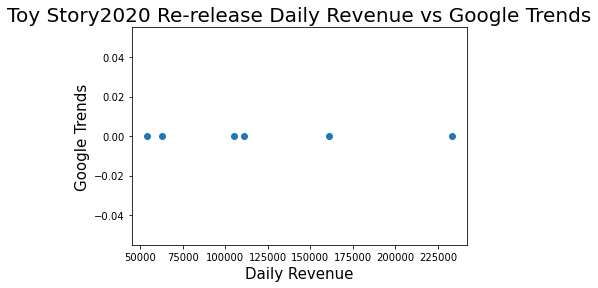

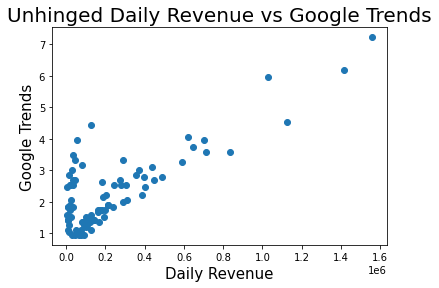

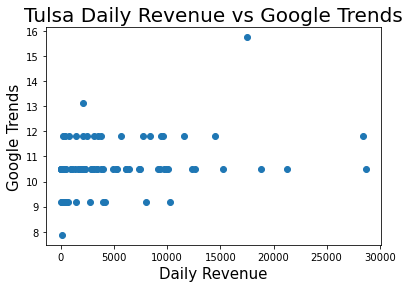

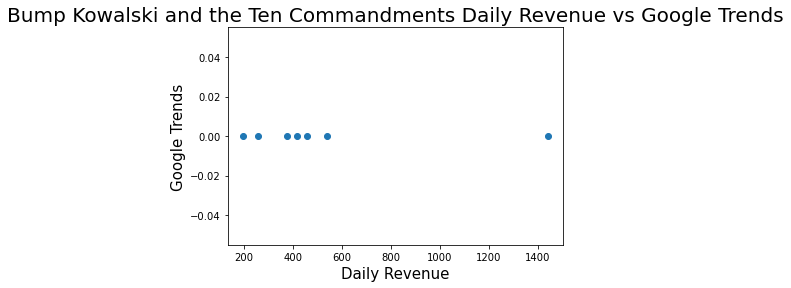

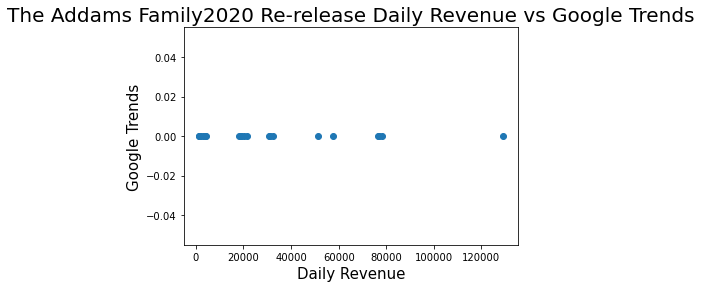

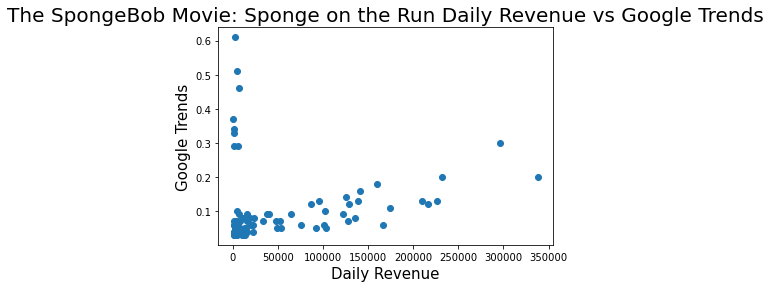

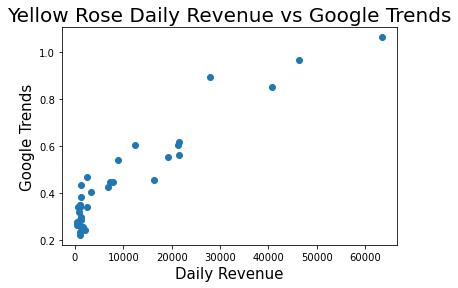

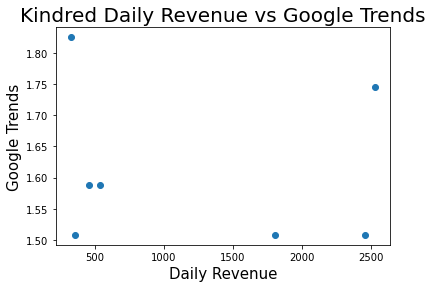

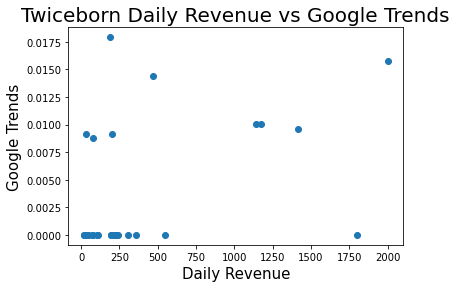

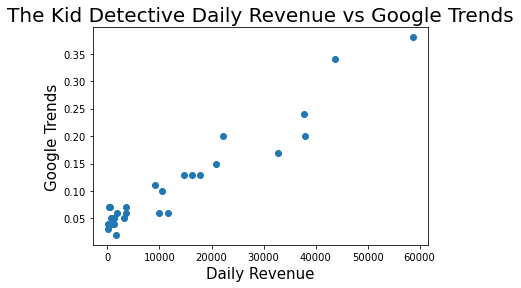

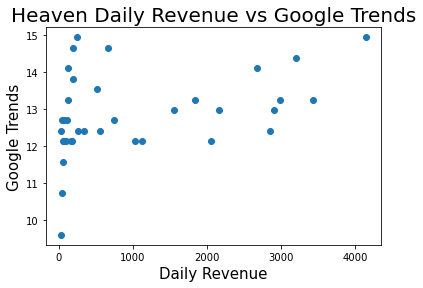

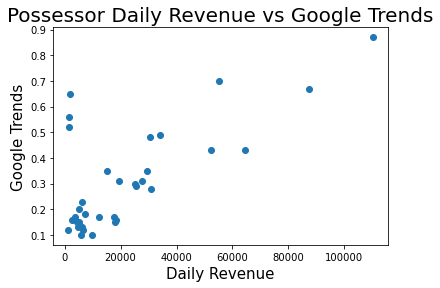

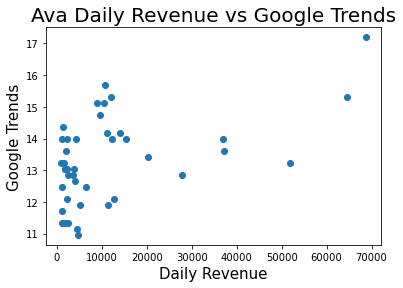

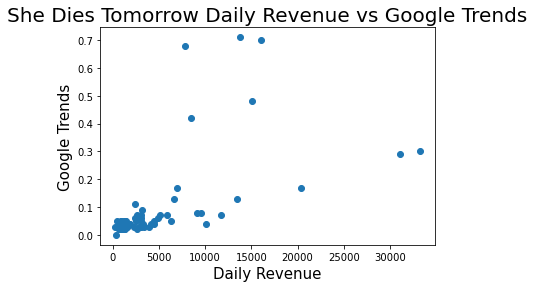

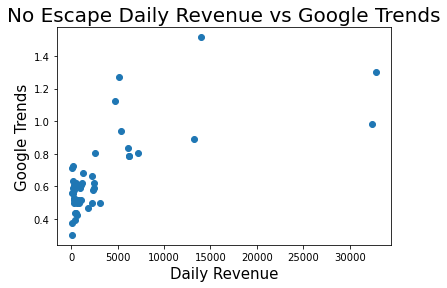

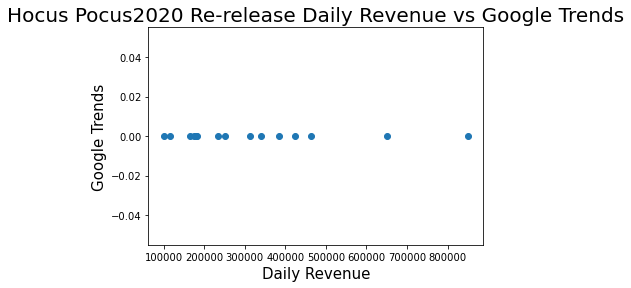

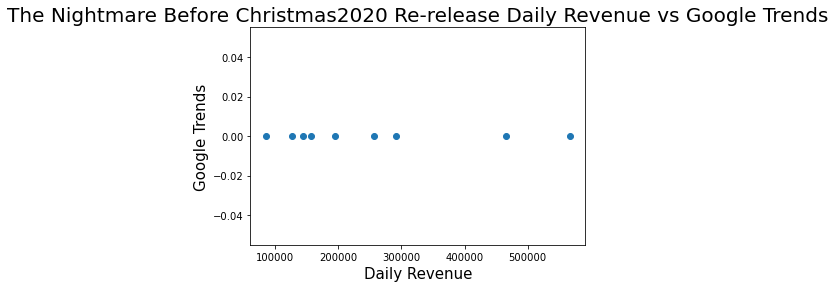

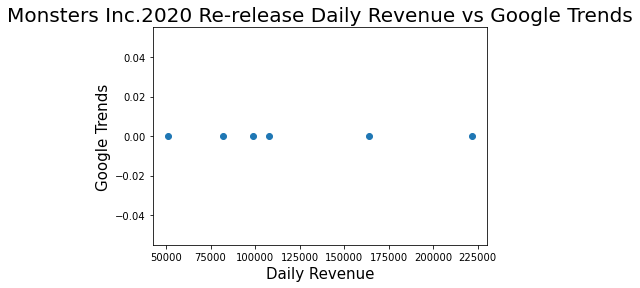

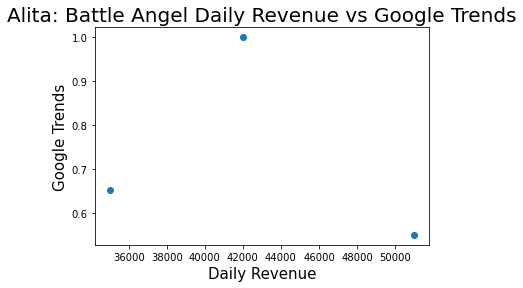

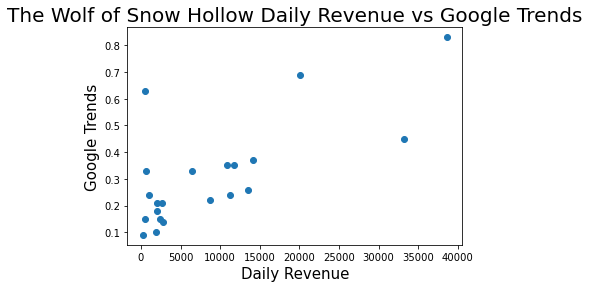

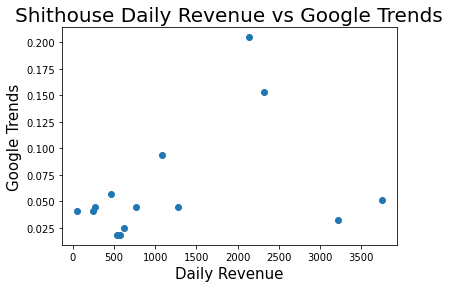

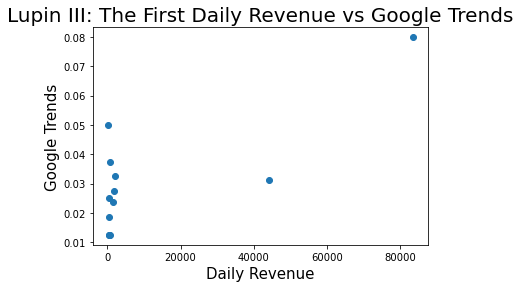

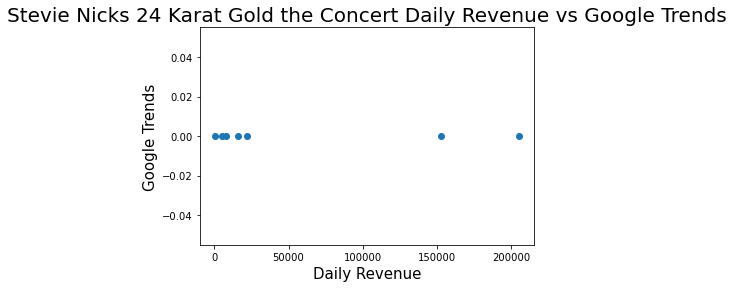

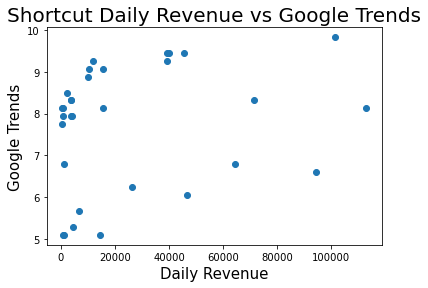

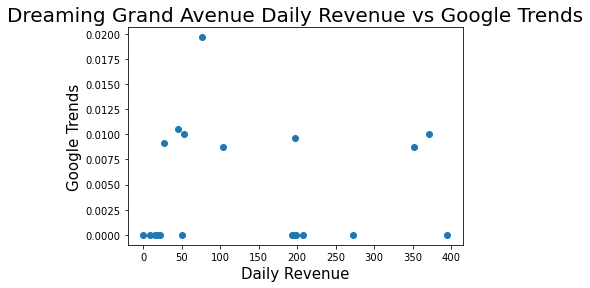

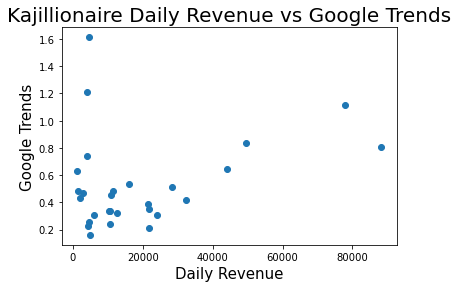

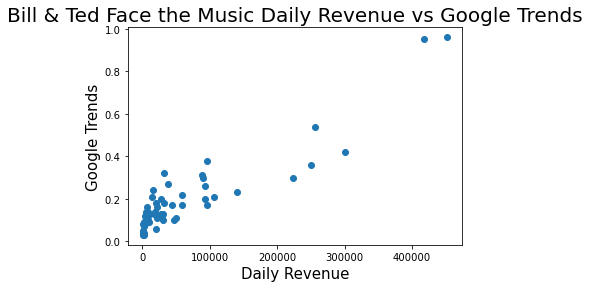

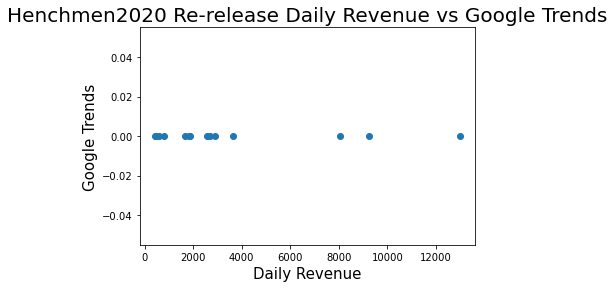

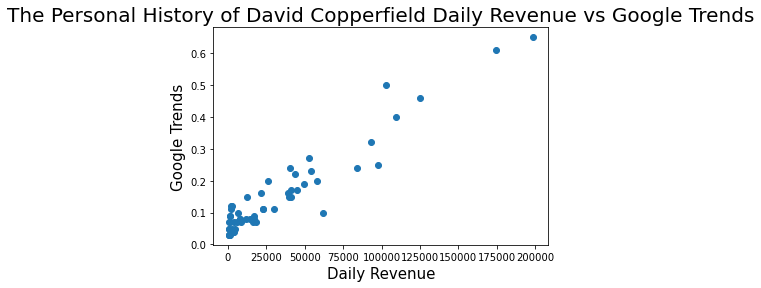

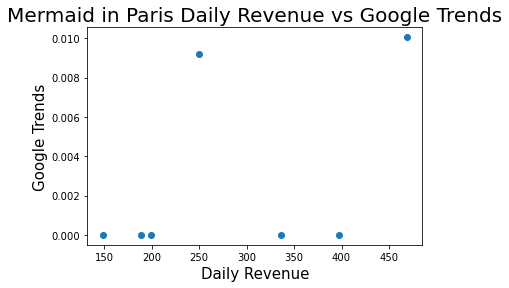

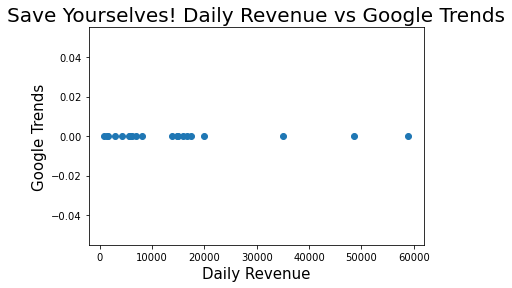

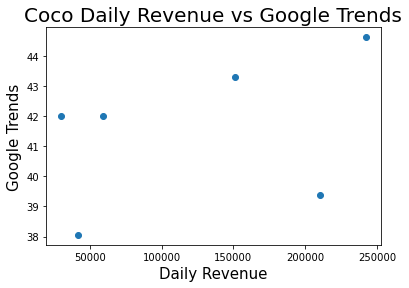

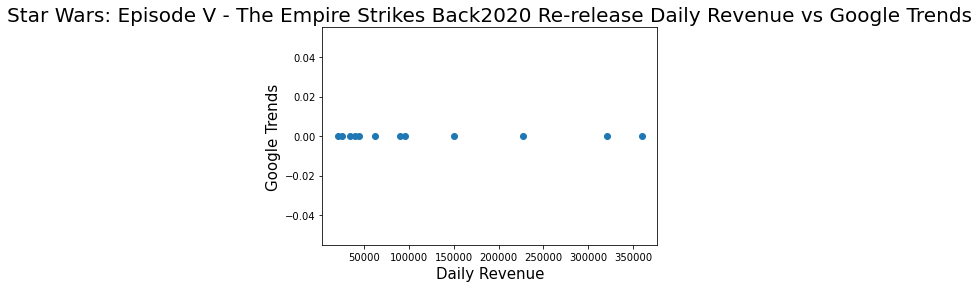

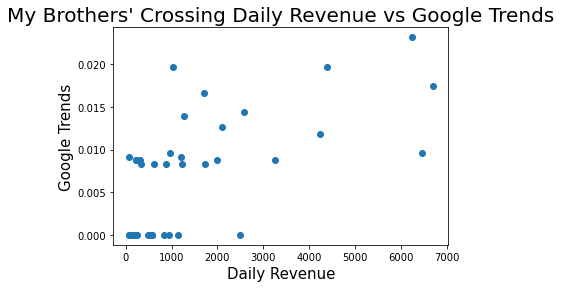

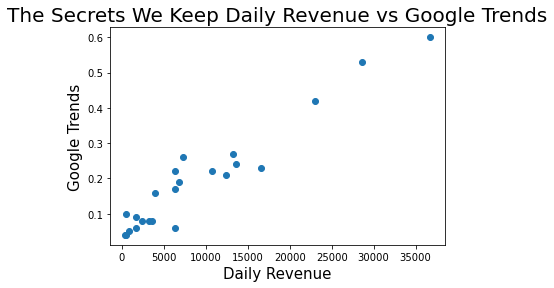

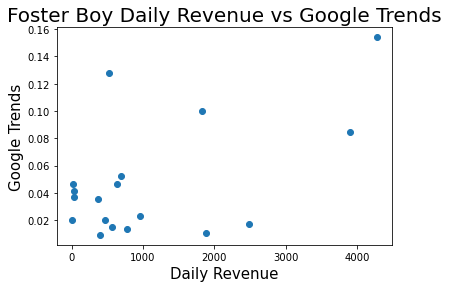

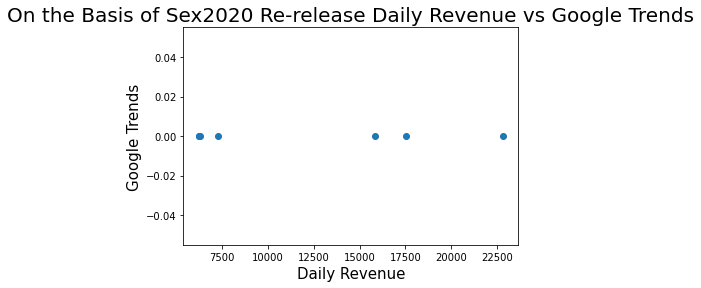

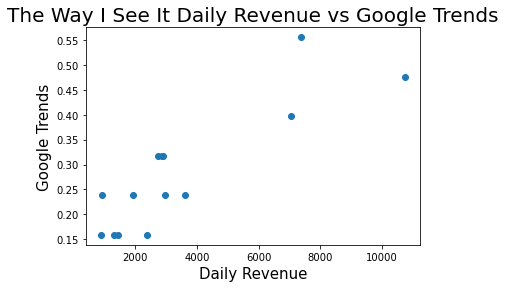

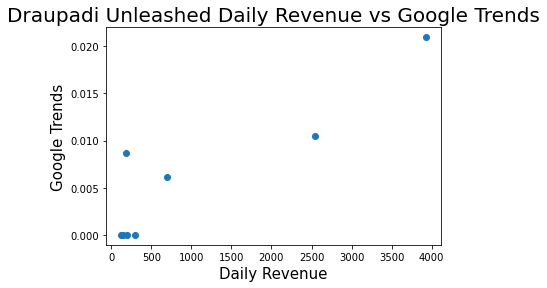

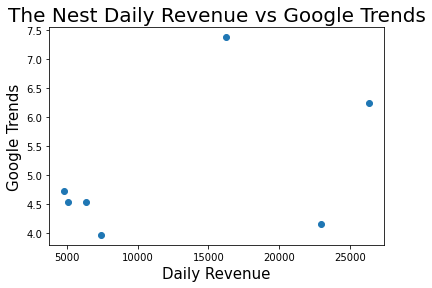

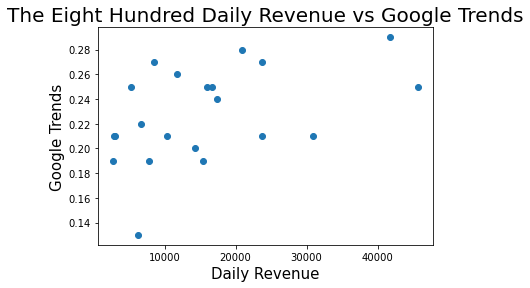

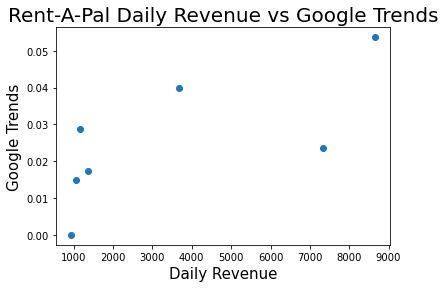

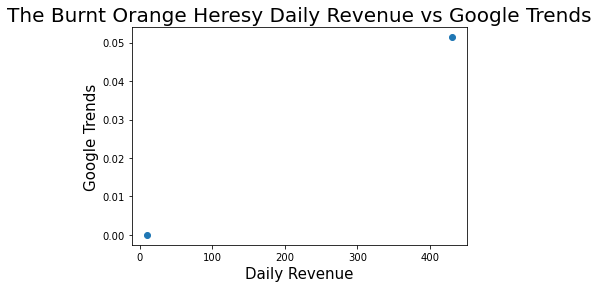

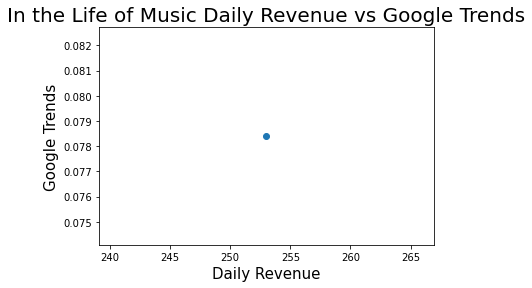

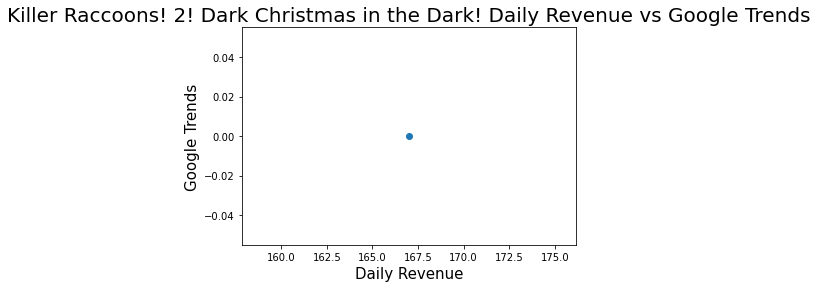

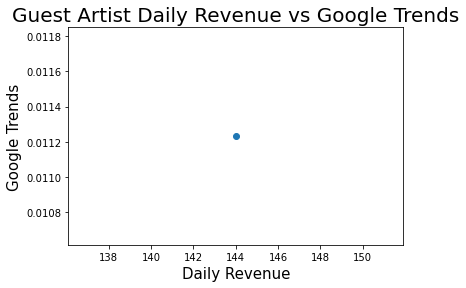

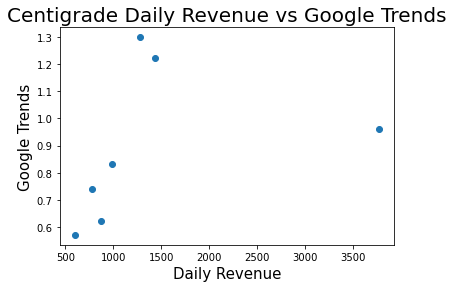

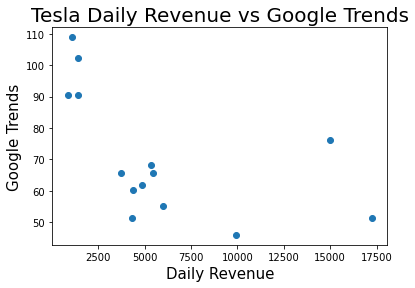

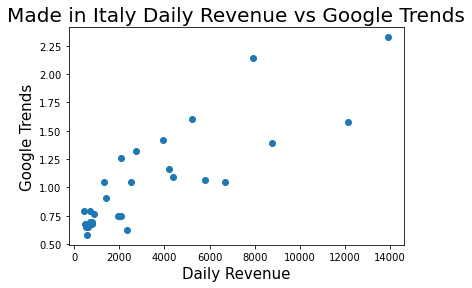

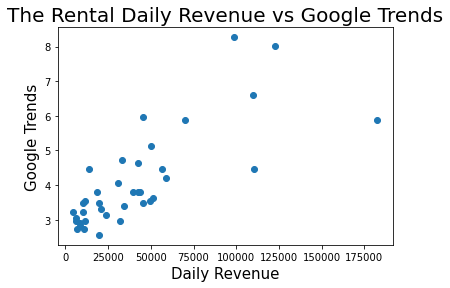

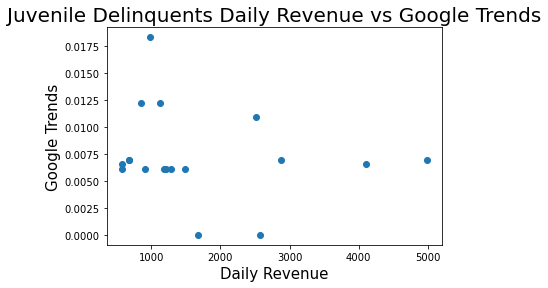

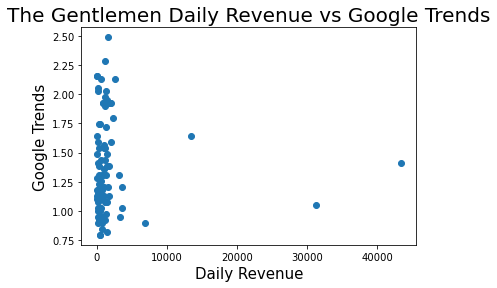

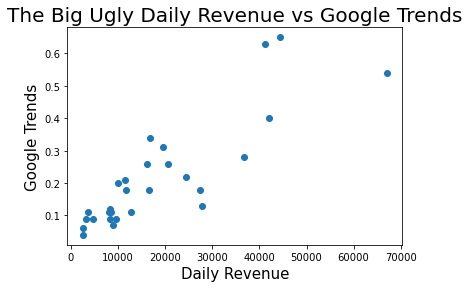

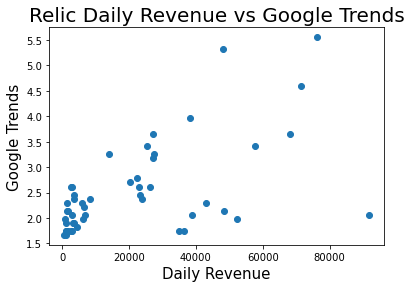

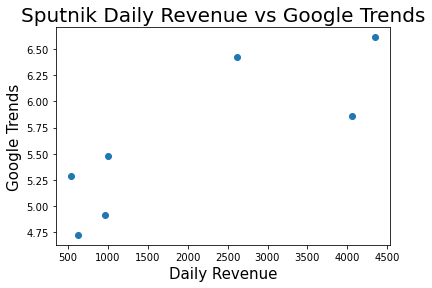

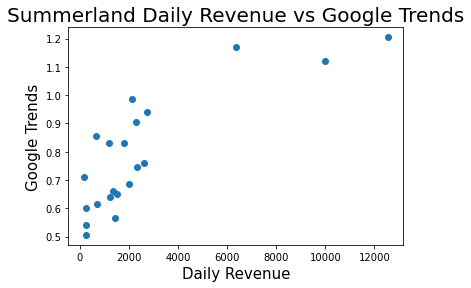

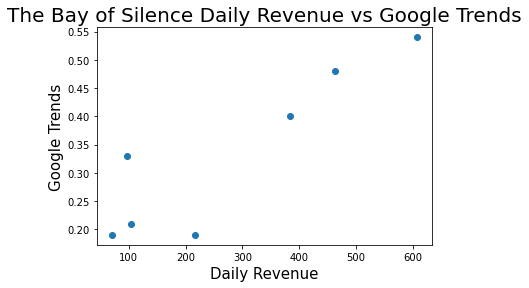

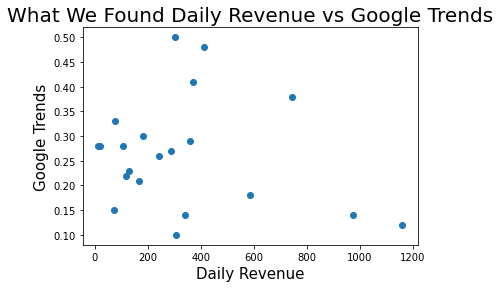

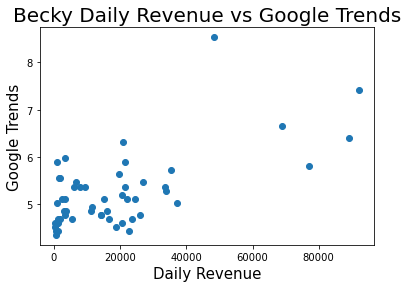

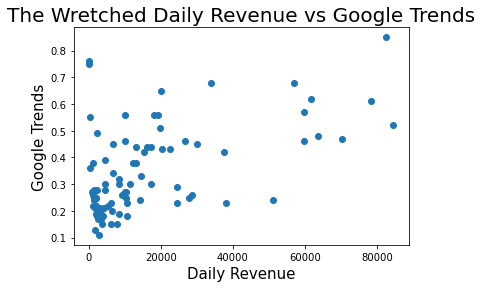

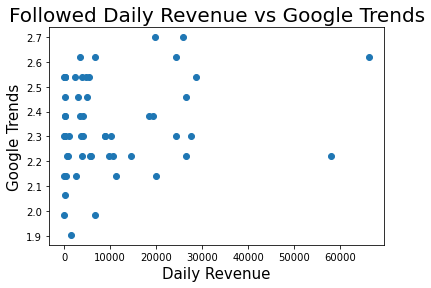

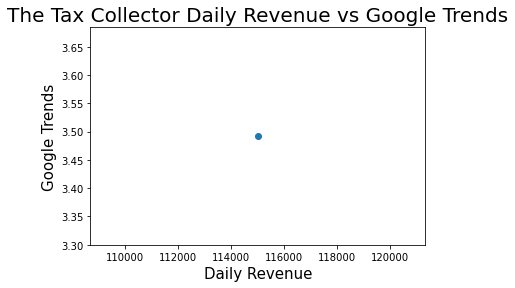

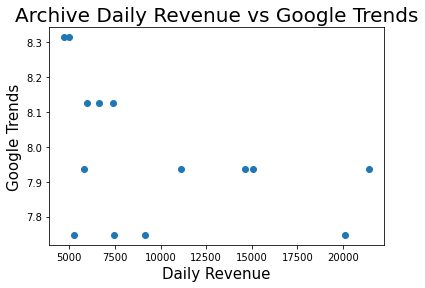

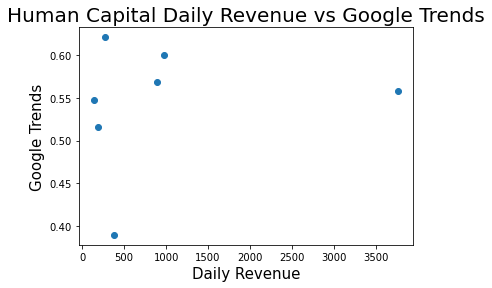

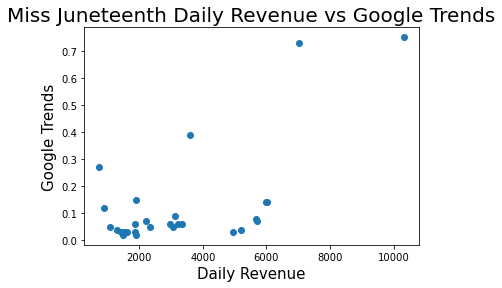

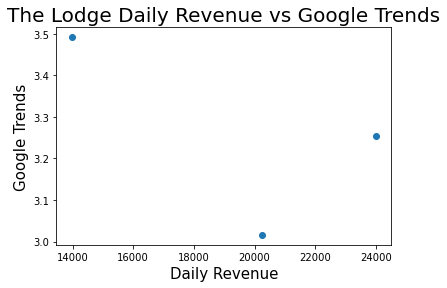

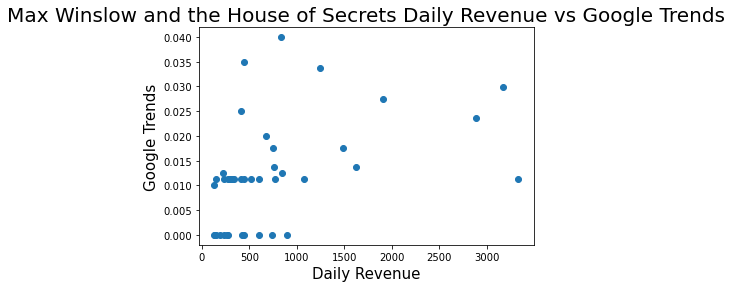

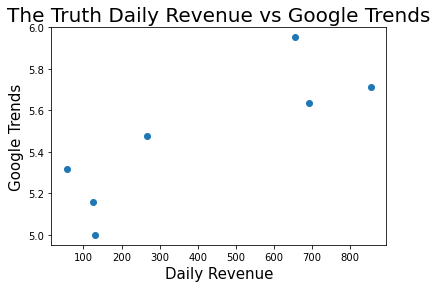

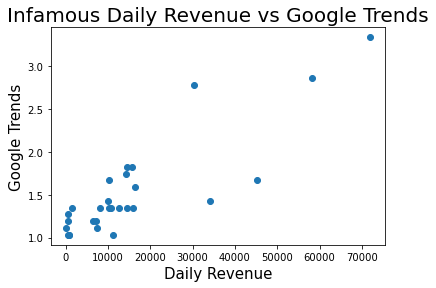

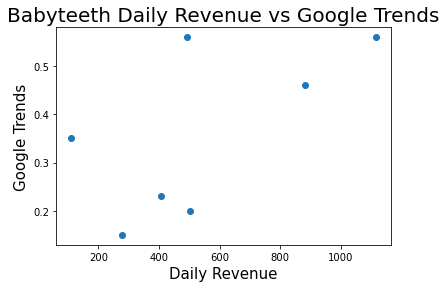

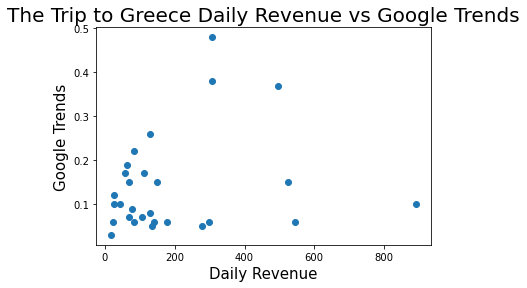

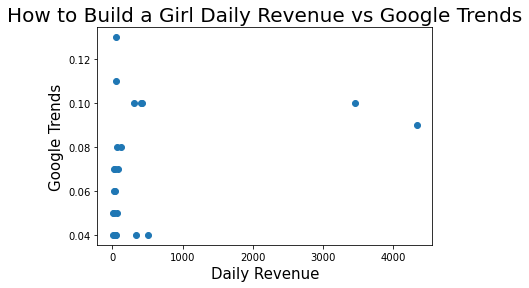

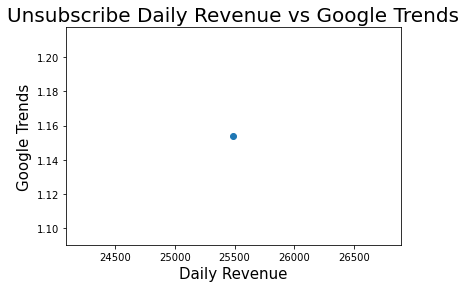

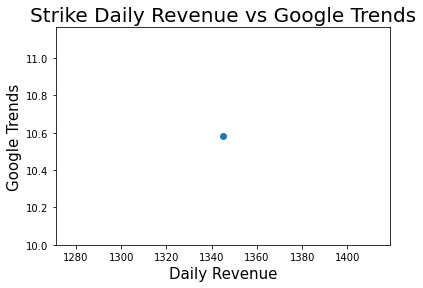

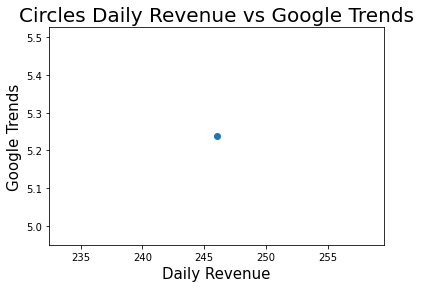

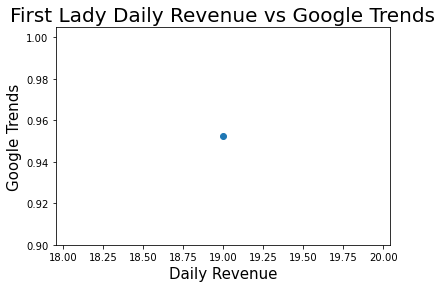

In [234]:
for movie in df['Release'].unique():
    plt.scatter(df[df['Release'] == movie]['Daily'][::-1], df[df['Release'] == movie]['google trends'][::-1])
    #plt.xticks(rotation = 70)
    plt.xlabel('Daily Revenue', fontsize=15)
    plt.ylabel('Google Trends', fontsize= 15)
    plt.title(f'{movie} Daily Revenue vs Google Trends', fontsize=20)
    plt.show()

1.79 7037017.0 The New Mutants
1.75 29231.0 Tesla
2.44 6480.0 Centigrade
1.48 1125007.0 Bill & Ted Face the Music
1.35 789854.0 The SpongeBob Movie: Sponge on the Run
3.9655172413793105 596421.0 Words on Bathroom Walls
1.45 475800.0 The Personal History of David Copperfield
0.64 118161.0 The Eight Hundred
0.0 1260.0 Juvenile Delinquents
2.362068965517241 14000.0 The Gentlemen
0.3008336842105263 71095.0 Tulsa
11.466666666666669 43691.0 The Rental
3.7 4909.0 Made in Italy
21.111111111111114 3546414.0 Unhinged
0.0 540.0 Bump Kowalski and the Ten Commandments
0.0646464 19386.0 My Brothers' Crossing
1.26 411741.0 The Personal History of David Copperfield
0.2259536842105263 32903.0 Tulsa
1.13 958052.0 Bill & Ted Face the Music
0.30000000000000004 2464.0 Tesla
1.18 1582.0 Centigrade
1.4500000000000002 3881746.0 The New Mutants
1.9770114942528734 363456.0 Words on Bathroom Walls
0.69 345000.0 The SpongeBob Movie: Sponge on the Run
1.0 94048.0 The Eight Hundred
1.02 994.0 Made in Italy
15.31746

2.4657534246575343 2306285.0 The War with Grandpa
2.03 30042.0 Yellow Rose
4.642857142857143 413923.0 2 Hearts
2.260869565217391 2850.0 No Escape
0.14844631578947368 1247.0 Tulsa
4.298245614035087 850735.0 The Empty Man
0.7884615384615384 10696.0 Ava
0.25 2651.0 The Last Shift
11.190476190476193 386000.0 The Nightmare Before Christmas2020 Re-release
10.555555555555557 151427.0 After We Collided
2.7534246575342465 1584851.0 The War with Grandpa
0.0 419.0 Bump Kowalski and the Ten Commandments
2.02 3119875.0 Come Play
0.32 39989.0 The Kid Detective
0.87 1327.0 The Wolf of Snow Hollow
3.333333333333333 128000.0 Alita: Battle Angel
0.37 217230.0 The New Mutants
0.014851200000000002 1690.0 Counter Column
0.006486480000000001 774.0 Twiceborn
1.6607142857142858 45051.0 The Call
0.78 18928.0 The SpongeBob Movie: Sponge on the Run
0.5858585858585859 9667.0 The Broken Hearts Gallery
0.0 328.0 Stevie Nicks 24 Karat Gold the Concert
0.9700000000000001 986.0 Heaven
1.1 271931.0 The Addams Family202

1.48 136000.0 Die Hard2020 Re-release
0.7674418604651163 7770.0 Buddy Games
0.52 51182.0 The Last Vermeer
2.301587301587302 179.0 After We Collided
1.96 189000.0 Wonder Woman2020 Re-release
6.673469387755102 297365.0 All My Life
6.0317460317460325 438340.0 Freaky
0.41000000000000003 12620.0 The New Mutants
1.4146341463414633 890.0 The Climb
1.7299999999999998 3760495.0 The Croods: A New Age
1.19 643180.0 Half Brothers
0.5438596491228069 5787.0 The Empty Man
1.36986301369863 324552.0 The War with Grandpa
0.16723200000000002 54811.0 The Forgotten Carols
8.377777777777778 182540.0 Honest Thief
3.4799999999999995 134000.0 How the Grinch Stole Christmas2020 Re-release
0.02496 145.0 Pray: The Story of Patrick Peyton
8.76595744680851 28404.0 The Godfather: Part III2020 Re-release
0.9099999999999999 24050.0 Vanguard
4.618181818181818 95360.0 Wild Mountain Thyme
1.8199999999999998 160000.0 The Grinch2020 Re-release
7.7777777777777795 171050.0 Let Him Go


<function matplotlib.pyplot.show(*args, **kw)>

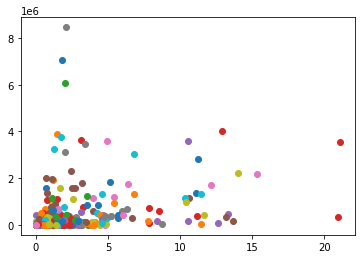

In [76]:
from  matplotlib import pyplot as plt
for i in range(df_weekly.shape[0]):
    x = df_weekly.iloc[i]['google trends']
    y = df_weekly.iloc[i]['Weekly']
    plt.scatter(x,y)
    print(x, y, df_weekly.iloc[i]['Release'])
plt.show

In [59]:
import datetime
from datetime import date, timedelta

def get_data():
    print('This shit works yo!')

def is_it_tuesday():
    if datetime.datetime.today().weekday() == 1:
        get_data() 
is_it_tuesday()

This shit works yo!


In [38]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from datetime import date, timedelta
import datetime
import re
'''This code scrapes box office mojo for all movie data in between dates d1 to d2'''

d1 = date(2020,8,24)
#d1 = date(2020,12,7)
d2 = date(2020,12,6)